# Immunization rates

In [27]:
import csv

immunization_country_name_copy_map = {
    "Serbia": "Kosovo",
    "China": "Taiwan, China"
}

def immunization_rates_by_country_by_vaccination():
    result = {}
    with open('../data/raw/full-immunization.csv', 'r') as csvfile:
         data = csv.reader(csvfile, delimiter=',', quotechar='"')
         vaccinations = next(data)
         next(data)  # skip second header row
         for row in data:
            for vi, vacc in enumerate(vaccinations):
                if vacc == "":
                    continue
                if not vacc in result:
                    result[vacc] = {}
                country = row[0]
                if row[vi] == '':
                    if country in immunization_country_name_copy_map:
                        result[vacc][immunization_country_name_copy_map[country]] = 0
                    result[vacc][country] = 0
                else:
                    if country in immunization_country_name_copy_map:
                        result[vacc][immunization_country_name_copy_map[country]] = int(row[vi])
                    result[vacc][country] = int(row[vi])
    return result

immunization_rates_by_country_by_vaccination_cache = immunization_rates_by_country_by_vaccination()

def get_immunization_rate(vaccination, country):
    if vaccination in immunization_rates_by_country_by_vaccination_cache:
        country_data = immunization_rates_by_country_by_vaccination_cache[vaccination]
        if country in country_data:
            return country_data[country]
    return None

# WDI Data

In [44]:
import csv

wdi_country_column = 0
wdi_indicator_code_column = 3
wdi_year_start_column = 4

wdi_country_name_map = {
    "Bahamas, The": "Bahamas",
    "Bolivia": "Bolivia (Plurinational State of)",
    "Congo, Rep.": "Congo",
    "Cote d'Ivoire": "Côte d'Ivoire",
    "Czech Republic": "Czechia",
    "Korea, Dem. People's Rep.": "Democratic People's Republic of Korea",
    "Congo, Dem. Rep.": "Democratic Republic of the Congo",
    "Egypt, Arab Rep.": "Egypt",
    "Gambia, The": "Gambia",
    "Iran, Islamic Rep.": "Iran (Islamic Republic of)",
    "Kyrgyz Republic": "Kyrgyzstan",
    "Lao PDR": "Lao People's Democratic Republic",
    "Micronesia, Fed. Sts.": "Micronesia (Federated States of)",
    "Korea, Rep.": "Republic of Korea",
    "Moldova": "Republic of Moldova",
    "St. Kitts and Nevis": "Saint Kitts and Nevis",
    "St. Lucia": "Saint Lucia",
    "St. Vincent and the Grenadines": "Saint Vincent and the Grenadines",
    "Sao Tome and Principe": "Sao Tome and Principe",
    "Slovak Republic": "Slovakia",
    "North Macedonia": "Republic of North Macedonia",
    "United Kingdom": "United Kingdom of Great Britain and Northern Ireland",
    "Tanzania": "United Republic of Tanzania",
    "United States": "United States of America",
    "Venezuela, RB": "Venezuela (Bolivarian Republic of)",
    "Vietnam": "Viet Nam",
    "Yemen, Rep.": "Yemen"
}

wdi_regions = [
    "Arab World",
    "Caribbean small states",
    "Central Europe and the Baltics",
    "Early-demographic dividend",
    "East Asia & Pacific",
    "East Asia & Pacific (excluding high income)",
    "East Asia & Pacific (IDA & IBRD countries)",
    "Euro area",
    "Europe & Central Asia",
    "Europe & Central Asia (excluding high income)",
    "Europe & Central Asia (IDA & IBRD countries)",
    "European Union",
    "Fragile and conflict affected situations",
    "Heavily indebted poor countries (HIPC)",
    "High income",
    "IBRD only",
    "IDA & IBRD total",
    "IDA blend",
    "IDA only",
    "IDA total",
    "Late-demographic dividend",
    "Latin America & Caribbean",
    "Latin America & Caribbean (excluding high income)",
    "Latin America & the Caribbean (IDA & IBRD countries)",
    "Least developed countries: UN classification",
    "Low & middle income",
    "Low income",
    "Lower middle income",
    "Middle East & North Africa",
    "Middle East & North Africa (excluding high income)",
    "Middle East & North Africa (IDA & IBRD countries)",
    "Middle income",
    "North America",
    "Not classified",
    "OECD members",
    "Other small states",
    "Pacific island small states",
    "Post-demographic dividend",
    "Pre-demographic dividend",
    "Small states",
    "South Asia",
    "South Asia (IDA & IBRD)",
    "Sub-Saharan Africa",
    "Sub-Saharan Africa (excluding high income)",
    "Sub-Saharan Africa (IDA & IBRD countries)",
    "Upper middle income",
    "World"
]

wdi_data_cache = {}

def read_wdi_data(indicator):
    result = {}
    with open('../data/raw/WDIData.csv', 'r') as csvfile:
         data = csv.reader(csvfile, delimiter=',', quotechar='"')
         for row in data:    
            if row[wdi_indicator_code_column] != indicator:
                continue
            most_recent_value = 0
            for v in row[wdi_year_start_column:]:
                if v != "":
                    most_recent_value = float(v)
            country = row[wdi_country_column]
            if country in wdi_regions:
                continue
            if country in wdi_country_name_map:
                country = wdi_country_name_map[country]
            result[country] = most_recent_value
    return result

def get_wdi_indicator(indicator):
    if indicator not in wdi_data_cache:
        result = read_wdi_data(indicator)
        wdi_data_cache[indicator] = result
    return wdi_data_cache[indicator]

def get_intl_arrivals():
    get_wdi_indicator("ST.INT.ARVL")
    
def get_country_population(country):
    data = get_wdi_indicator("SP.POP.TOTL")
    if country in data:
        return data[country]
    print("Population not found for country: " + country)
    return None

# Growth rate util

In [45]:
import statistics

# Is there a better way to do this?
def growth_rate(vs):
    growth_by_day = []
    for i, v in enumerate(vs[1:], start = 1):
        growth_by_day.append(vs[i] / vs[i - 1])
    return statistics.mean(growth_by_day)

print(growth_rate([100,150,225,400]))
print(growth_rate([100,400,1600,6400,6400*4]))

1.5925925925925926
4.0


# Case data parsing

In [47]:
import csv

first_date_column = 4
country_column = 1

case_data_country_name_map = {
 "Bolivia": "Bolivia (Plurinational State of)",
 "Brunei": "Brunei Darussalam",
 "Congo (Brazzaville)": "Congo",
 "Cote d'Ivoire": "Côte d'Ivoire",
 "Korea, South": "Democratic People's Republic of Korea",
 "Congo (Kinshasa)": "Democratic Republic of the Congo",
 "Iran": "Iran (Islamic Republic of)",
 "Laos": "Lao People's Democratic Republic",
 "Burma": "Myanmar",
 "Korea, South": "Republic of Korea",
 "Moldova": "Republic of Moldova",
 "Russia": "Russian Federation",
 "Syria": "Syrian Arab Republic",
 "North Macedonia": "Republic of North Macedonia",
 "Taiwan*": "Taiwan, China",
 "Tanzania": "United Republic of Tanzania",
 "United Kingdom": "United Kingdom of Great Britain and Northern Ireland",
 "US": "United States of America",
 "Venezuela": "Venezuela (Bolivarian Republic of)",
 "Vietnam": "Viet Nam",
}
omitted_countries = ["Diamond Princess"]

def read_global_csv(file):
    result = {}
    with open(file, 'r') as csvfile:
        data = csv.reader(csvfile, delimiter=',', quotechar='"')
        header = next(data)
        #last_col = header.index('3/23/20')
        last_col = -1
        for row in data:
            cases = [int(x) for x in row[first_date_column:last_col]]
            country = row[country_column]
            if country in omitted_countries:
                continue
            if country in case_data_country_name_map:
                country = case_data_country_name_map[country]
            if row[1] in result:
                result[country] = [x + result[country][i] for i, x in enumerate(cases)]
            else:
                result[country] = cases
    return result

def read_global_cases():
    return read_global_csv('../data/raw/time_series_covid19_confirmed_global.csv')

def read_global_deaths():
    return read_global_csv('../data/raw/time_series_covid19_deaths_global.csv')
            
cases = read_global_cases()

# Case data calculations

In [48]:
import csv

default_options = {
    "threshold": 100,
    "max_days_beyond_threshold": 60,
    "strategy": "rate"
}

# Omit countries that don't have at least this many people to prune outliers
minimum_country_population = 100000

# Valid only for deaths & upper middle+ slice.
international_arrival_rate_normalization_constant = -8.80057277e-10
international_arrival_population_normalization_constant = -1.51186143e-06

def case_counts_to_consider(vs, options):
    """Narrow case counts to a number of days after meeting start criteria."""
    for i, v in enumerate(vs):
        if v >= options['threshold']:
            index_of_last_day_in_range = min(len(vs), i + options['max_days_beyond_threshold'])
            return vs[i:index_of_last_day_in_range + 1]
    return None

def average_case_growth(vs, options):
    """Utility for calculating average case growth"""
    d = case_counts_to_consider(vs, options)
    if not d or len(d) < 2:
        return None
    return growth_rate(d)

def calculate_growth_rates_by_country(data, options = {}):
    """Heart of growth rate calculations. Supports strategies."""
    result = {}
    options = {**default_options, **options}
    for country, cases in data.items():
        if options['strategy'] == 'rate':
            case_counts_by_day = [int(x) for x in cases]
            growth_rate = average_case_growth(case_counts_by_day, options)
            if growth_rate and country in get_wdi_indicator(wdi_international_arrivals_indicator):
                offset = 0
                if 'normalizations' in options and 'intl_arrivals_deaths_upper_middle' in options['normalizations']:
                    offset = international_arrival_rate_normalization_constant * get_wdi_indicator(wdi_international_arrivals_indicator)[country]
                result[country] = max(growth_rate + offset, 1.0)
        elif options['strategy'] == 'population':
            most_recent_value = int(cases[-1])
            pop = get_country_population(country)
            if pop and country in get_wdi_indicator(wdi_international_arrivals_indicator):
                offset = 0
                if 'normalizations' in options and 'intl_arrivals_deaths_upper_middle' in options['normalizations']:
                    offset = international_arrival_population_normalization_constant * get_wdi_indicator(wdi_international_arrivals_indicator)[country]
                if pop > minimum_country_population:
                    result[country] = max(0, (most_recent_value / (pop / 1000000)) + offset)
        elif options['strategy'] == 'population_adj':
            immunization_rate = get_immunization_rate(options['vaccination'], country)
            most_recent_value = int(cases[-1])
            pop = get_country_population(country)
            if immunization_rate is None:
                continue
            if immunization_rate < options['immunization_rate_adjustment_threshold']:
                most_recent_value = int(cases[options['immunization_rate_adjustment']])
            if pop and pop > minimum_country_population:
                result[country] = most_recent_value / (pop / 1000000)
    return result

# Income group data

In [49]:
income_groups = [
    "low income",
    "lower middle income",
    "upper middle income",
    "high income"
]

income_group_country_name_map = {
    "Bahamas, The": "Bahamas",
    "Bolivia": "Bolivia (Plurinational State of)",
    "Congo, Rep.": "Congo",
    "C?te d'Ivoire": "Côte d'Ivoire",
    "Czech Republic": "Czechia",
    "Korea, Dem. People's Rep.": "Democratic People's Republic of Korea",
    "Congo, Dem. Rep.": "Democratic Republic of the Congo",
    "Egypt, Arab Rep.": "Egypt",
    "Gambia, The": "Gambia",
    "Iran, Islamic Rep.": "Iran (Islamic Republic of)",
    "Kyrgyz Republic": "Kyrgyzstan",
    "Lao PDR": "Lao People's Democratic Republic",
    "Micronesia, Fed. Sts.": "Micronesia (Federated States of)",
    "Korea, Rep.": "Republic of Korea",
    "Moldova": "Republic of Moldova",
    "St. Kitts and Nevis": "Saint Kitts and Nevis",
    "St. Lucia": "Saint Lucia",
    "St. Vincent and the Grenadines": "Saint Vincent and the Grenadines",
    "S?o Tom? and Principe": "Sao Tome and Principe",
    "Slovak Republic": "Slovakia",
    "North Macedonia": "Republic of North Macedonia",
    "United Kingdom": "United Kingdom of Great Britain and Northern Ireland",
    "Tanzania": "United Republic of Tanzania",
    "United States": "United States of America",
    "Venezuela, RB": "Venezuela (Bolivarian Republic of)",
    "Vietnam": "Viet Nam",
    "Yemen, Rep.": "Yemen"
}

income_group_country_column = 0
income_group_income_group_column = 4

def read_countries_by_income_threshold():
    result = {}
    with open('../data/raw/income-groups.csv', 'r') as csvfile:
        data = csv.reader(csvfile, delimiter=',', quotechar='"')
        next(data)   # Drop the header row
        for row in data:
            country = row[income_group_country_column]
            if country in income_group_country_name_map:
                country = income_group_country_name_map[country]
            group = income_groups.index(row[income_group_income_group_column].lower())
            result[country] = group
    return result

income_group_cache = read_countries_by_income_threshold()

def meets_income_threshold(country, options):
    """Predicate to check whether the country meets the income thresholds configured."""
    if not 'income_threshold' in options:
        return True
    thresh_idx = income_groups.index(options['income_threshold'].lower())
    if not country in income_group_cache:
        print("Income group not found for " + country)
        return False
    country_idx = income_group_cache[country]
    if 'income_upper_threshold' in options:
        upper_idx = income_groups.index(options['income_upper_threshold'].lower())
        return country_idx >= thresh_idx and country_idx <= upper_idx
    return country_idx >= thresh_idx

# Plotting utilities

In [50]:
def group_rates_by_country(map_a, map_b, options):
    """Transform two maps into a pair of arrays, where like array indexes map to the same key."""
    a_ordered = []
    b_ordered = []
    for country, v in map_a.items():
        if "only_countries" in options and country not in options['only_countries']:
            continue
        if not meets_income_threshold(country, options):
            continue
        if country in map_b:
            b_ordered.append(map_b[country])
            a_ordered.append(v)
        else:
            print("No data for " + country)
    return b_ordered, a_ordered

# Case plotting

In [51]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
    
def plot_cases(cases, options = {}):
    options = {**default_options, **options}
    if 'omitted_countries' in options:
        for country in options['omitted_countries']:
            del cases[country]
    for vacc, immunization_rates_by_country in immunization_rates_by_country_by_vaccination().items():
        options['vaccination'] = vacc
        growth_rates_by_country = calculate_growth_rates_by_country(cases, options)
        fig, ax = plt.subplots()
        fig.set_size_inches(14,10)
        immunization_rates_ordered, growth_rates_ordered = group_rates_by_country(
            growth_rates_by_country,
            immunization_rates_by_country,
            options)
        X = sm.add_constant([[x] for x in immunization_rates_ordered])
        fit = sm.OLS(growth_rates_ordered, X).fit()
        plt.title(options['title'] + "\n" +
                  vacc + "\n" +
                  options['income_threshold'] + " or greater\n" +
                  "(p=" + str(round(fit.pvalues[1],5)) +
                  "; r=" + str(round(fit.rsquared,5)) + ")")
        plt.xlabel("Immunization rates")
        if options['strategy'] == 'rate':
            plt.ylabel("Average daily rate of change")
        elif options['strategy'] == 'population':
            plt.ylabel("Count per million inhabitants")            
        ax.plot(immunization_rates_ordered, growth_rates_ordered, 'bo')
        ax.plot(immunization_rates_ordered, [fit.params[1] * rate + fit.params[0] for rate in immunization_rates_ordered])
    plt.tight_layout()
    plt.show()

# Plot cases by rate

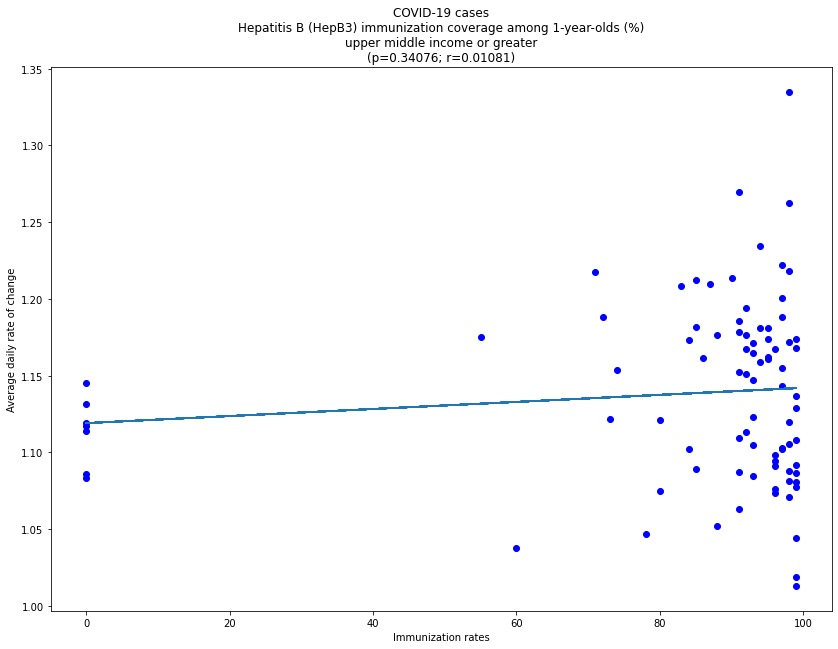

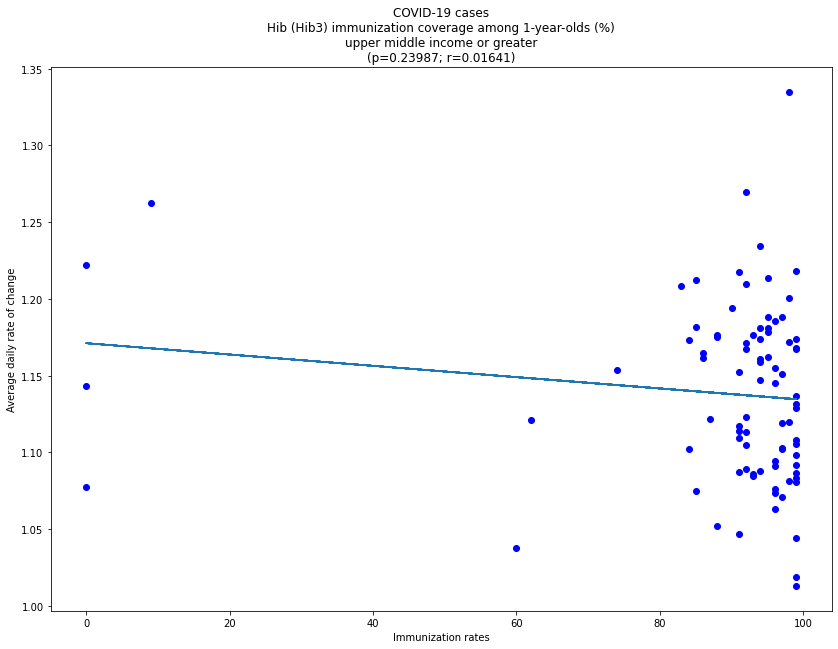

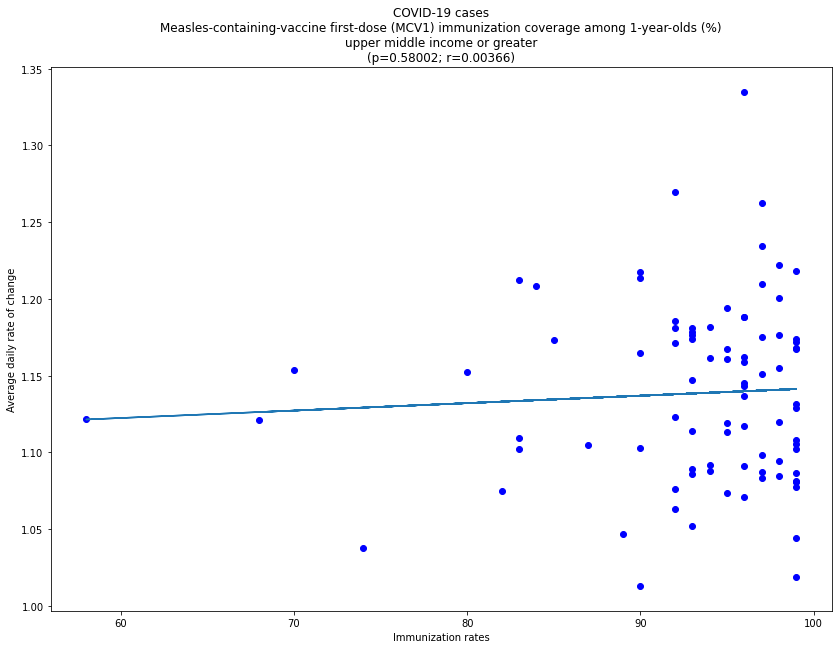

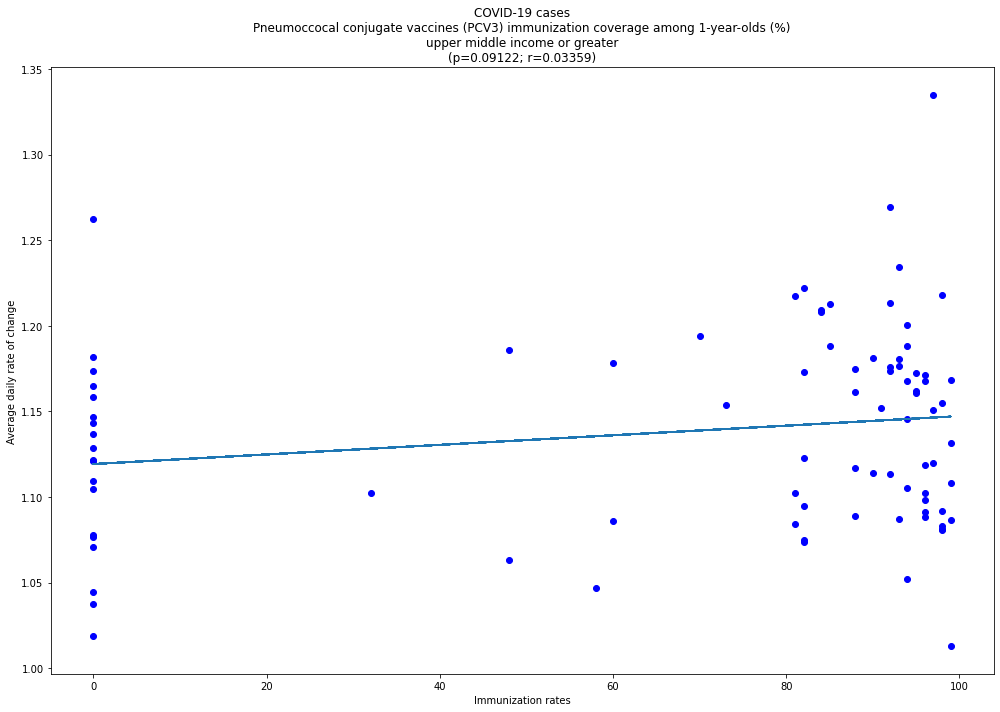

In [52]:
plot_cases(read_global_cases(), {
    "title": "COVID-19 cases",
    "income_threshold": "upper middle income",
    "strategy": "rate",
    "max_days_beyond_threshold": 300,
    "threshold": 100
})

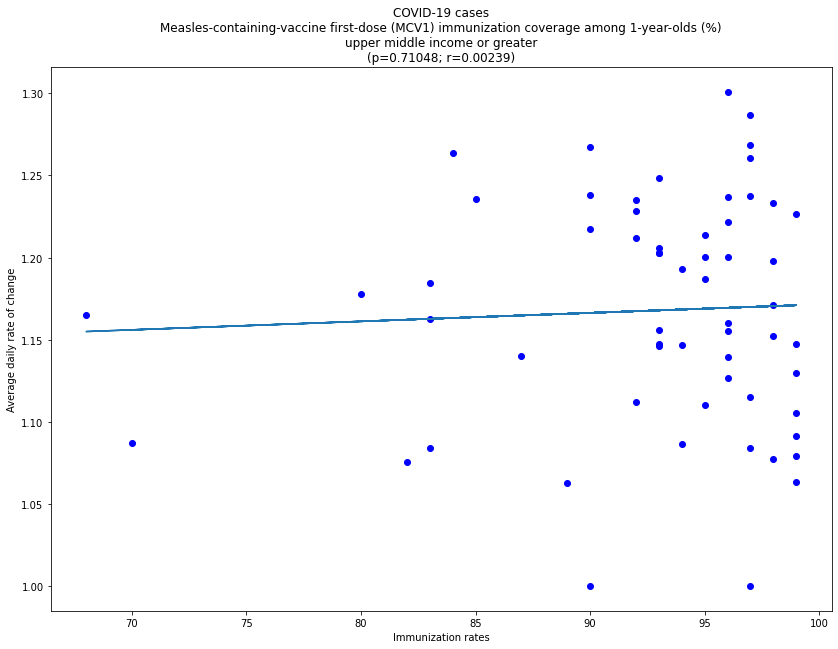

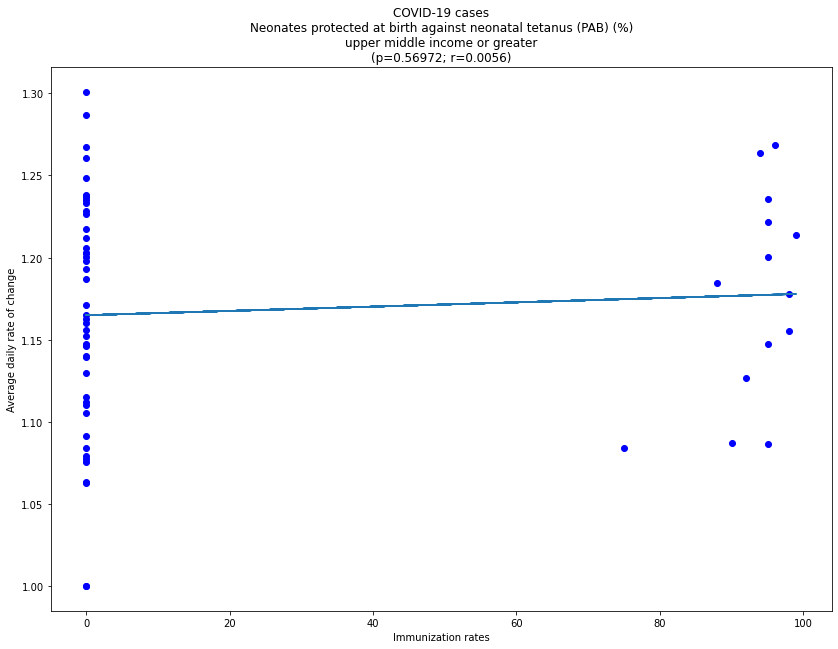

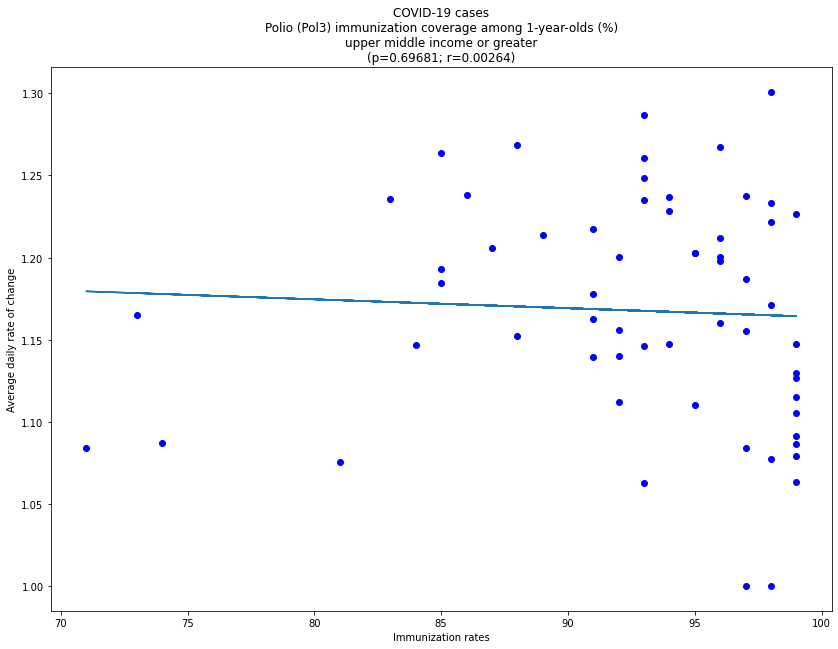

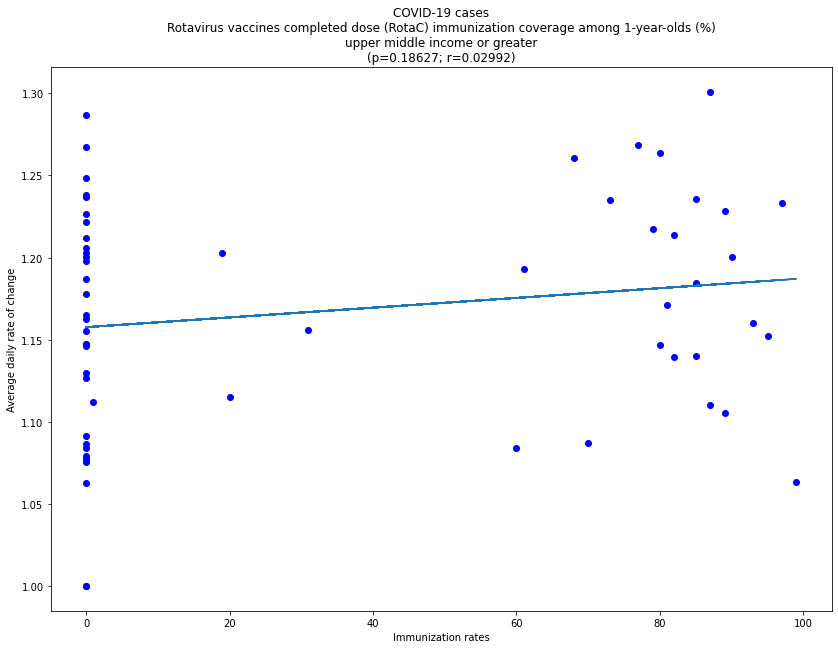

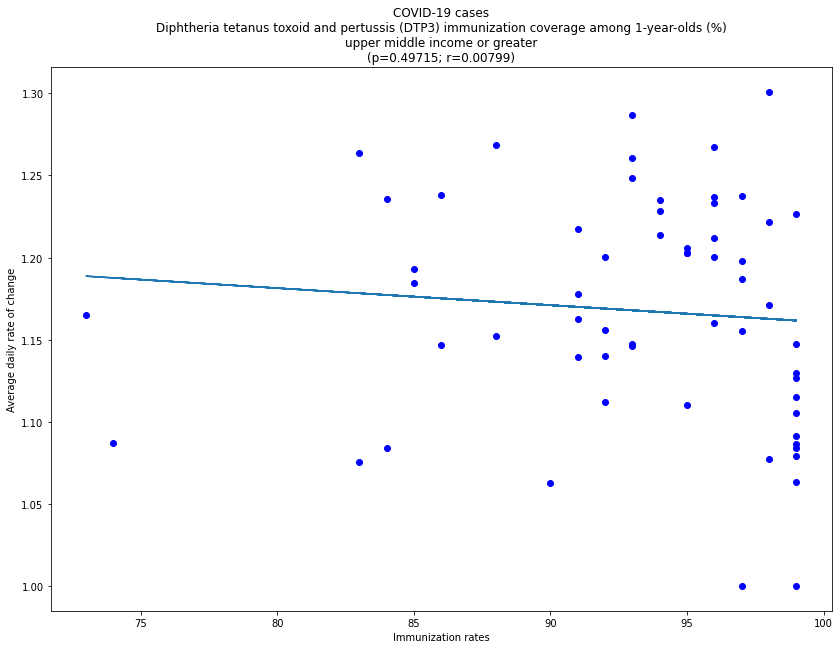

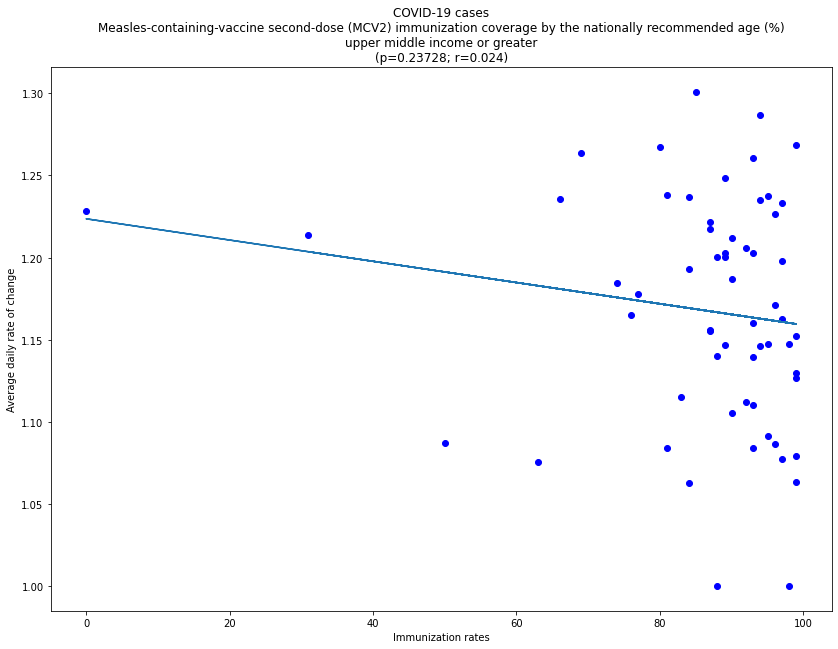

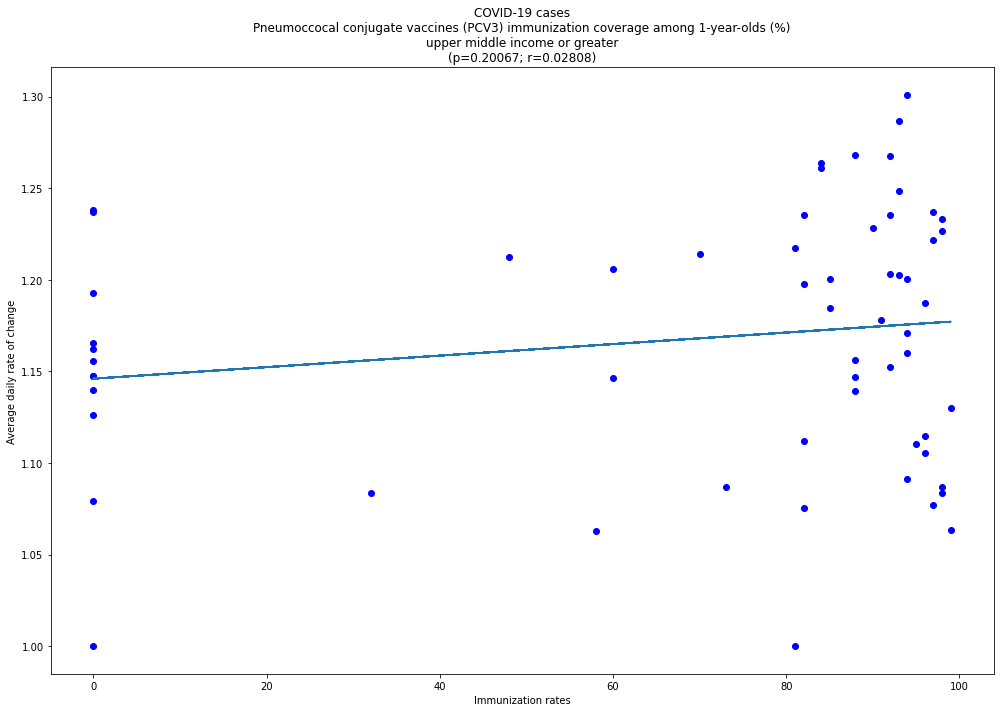

In [53]:
plot_cases(read_global_deaths(), {
    "title": "COVID-19 cases",
    "income_threshold": "upper middle income",
    "strategy": "rate",
    "max_days_beyond_threshold": 300,
    "threshold": 10,
})

# Plot cases by population

Population not found for country: Holy See
Population not found for country: Taiwan, China
Population not found for country: MS Zaandam
Population not found for country: Western Sahara
Population not found for country: Holy See
Population not found for country: Taiwan, China
Population not found for country: MS Zaandam
Population not found for country: Western Sahara
Population not found for country: Holy See
Population not found for country: Taiwan, China
Population not found for country: MS Zaandam
Population not found for country: Western Sahara
Population not found for country: Holy See
Population not found for country: Taiwan, China
Population not found for country: MS Zaandam
Population not found for country: Western Sahara
Population not found for country: Holy See
Population not found for country: Taiwan, China
Population not found for country: MS Zaandam
Population not found for country: Western Sahara
Population not found for country: Holy See
Population not found for country

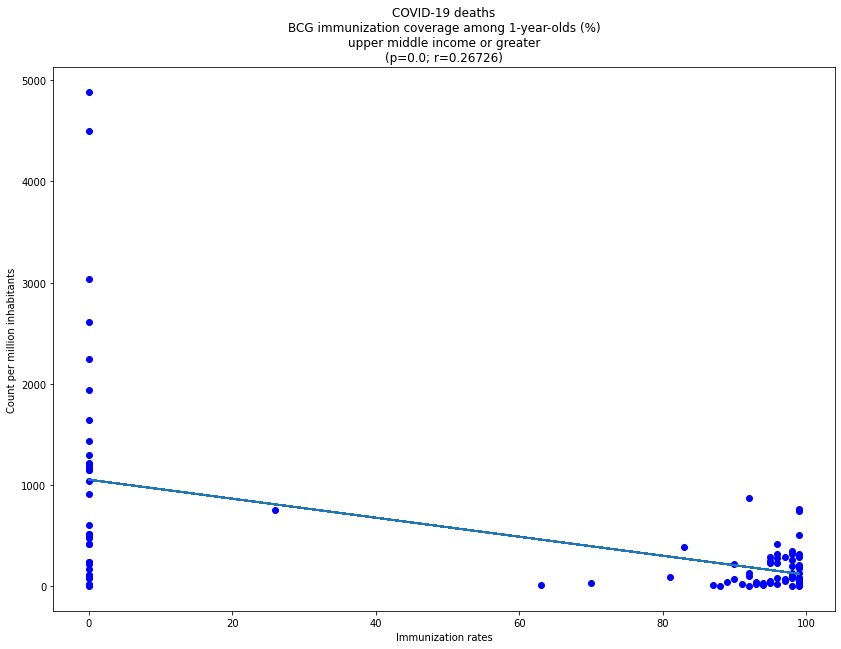

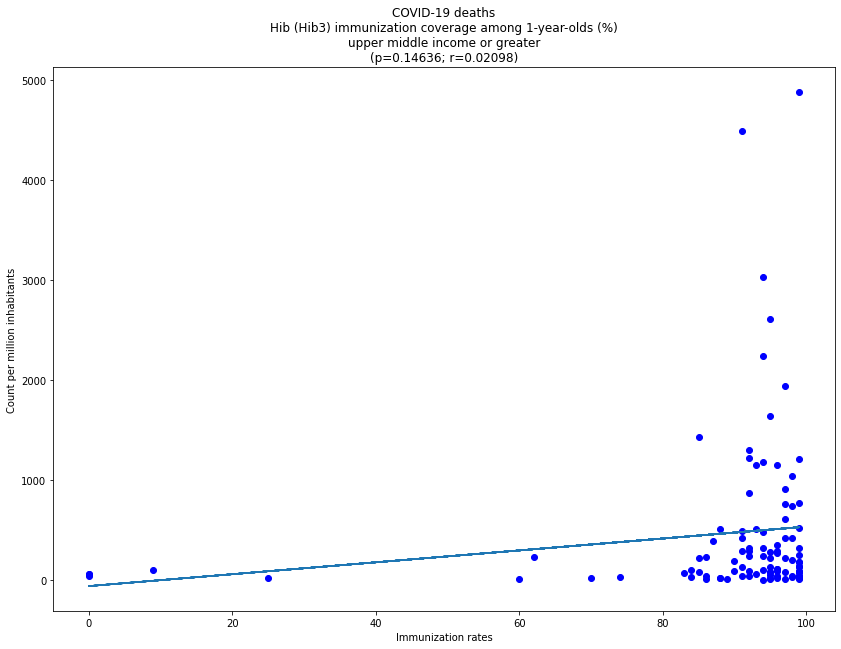

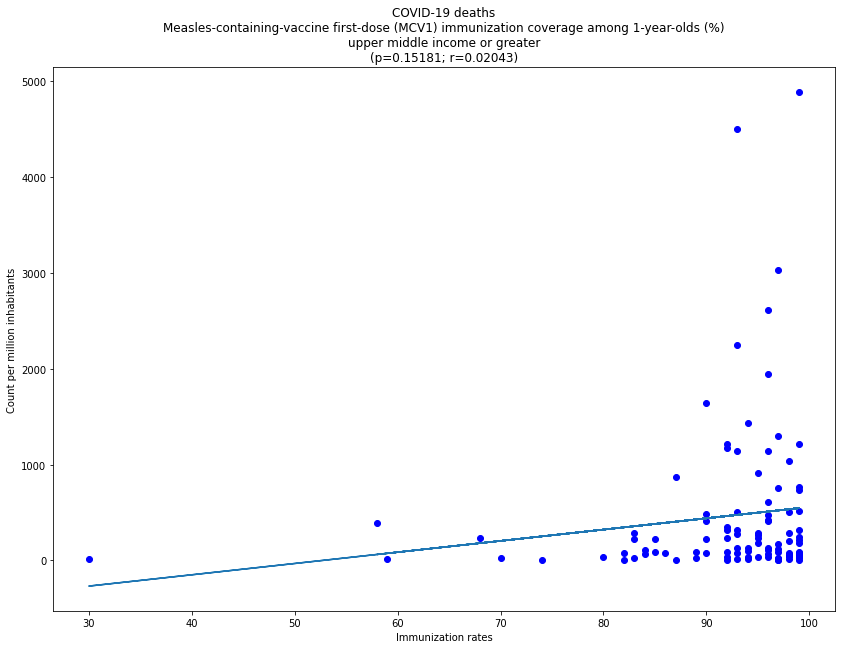

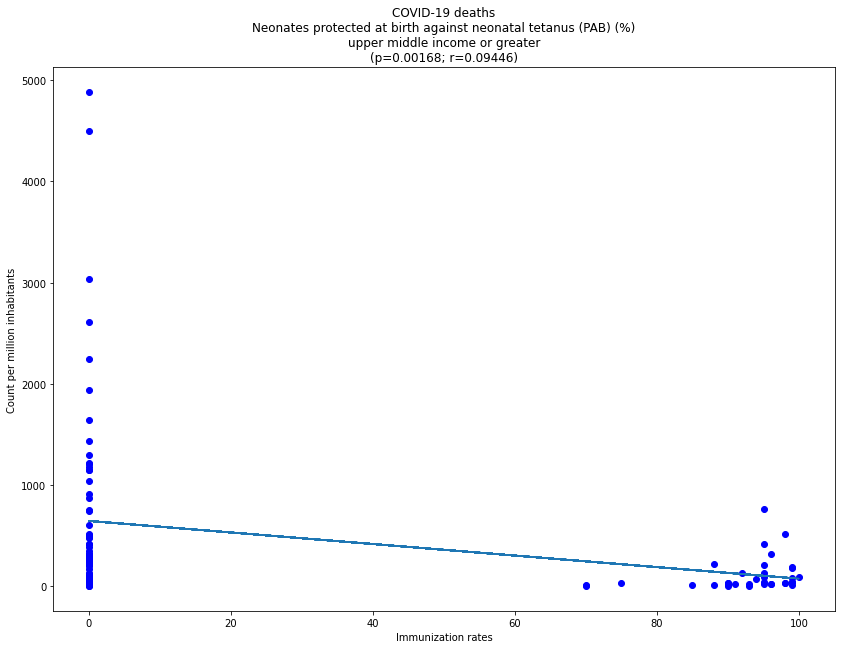

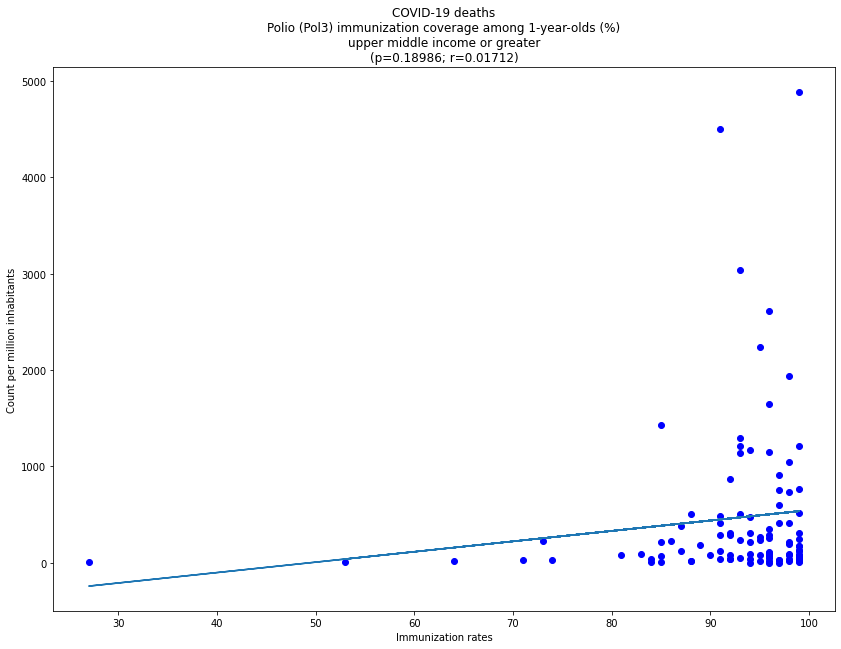

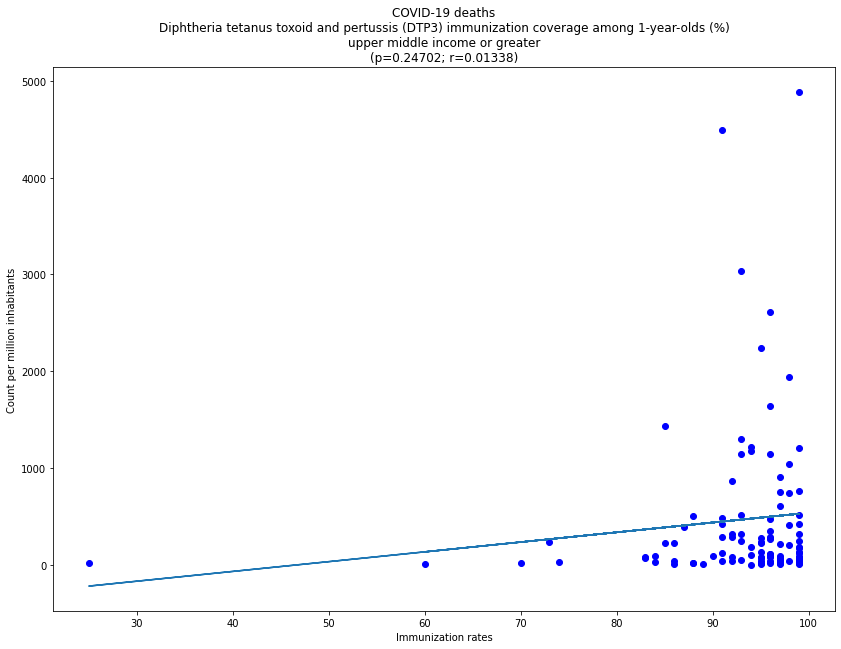

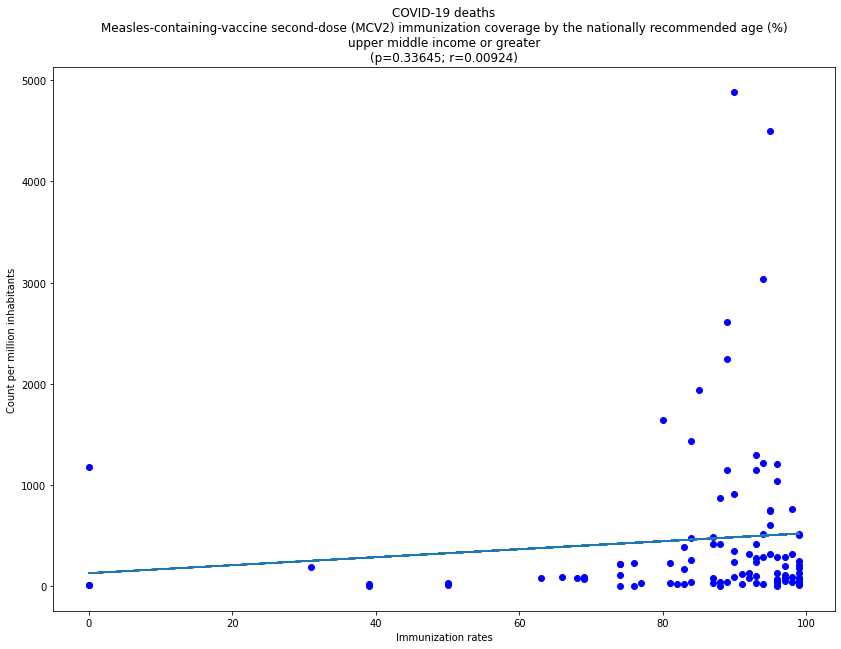

In [54]:
plot_cases(read_global_cases(), {
    "title": "COVID-19 deaths",
    "income_threshold": "upper middle income",
    "strategy": "population",
    'threshold': 100,
    "max_days_beyond_threshold": 300,
})

Population not found for country: Holy See
Population not found for country: Taiwan, China
Population not found for country: MS Zaandam
Population not found for country: Western Sahara
Population not found for country: Holy See
Population not found for country: Taiwan, China
Population not found for country: MS Zaandam
Population not found for country: Western Sahara
Population not found for country: Holy See
Population not found for country: Taiwan, China
Population not found for country: MS Zaandam
Population not found for country: Western Sahara
Population not found for country: Holy See
Population not found for country: Taiwan, China
Population not found for country: MS Zaandam
Population not found for country: Western Sahara
Population not found for country: Holy See
Population not found for country: Taiwan, China
Population not found for country: MS Zaandam
Population not found for country: Western Sahara
Population not found for country: Holy See
Population not found for country

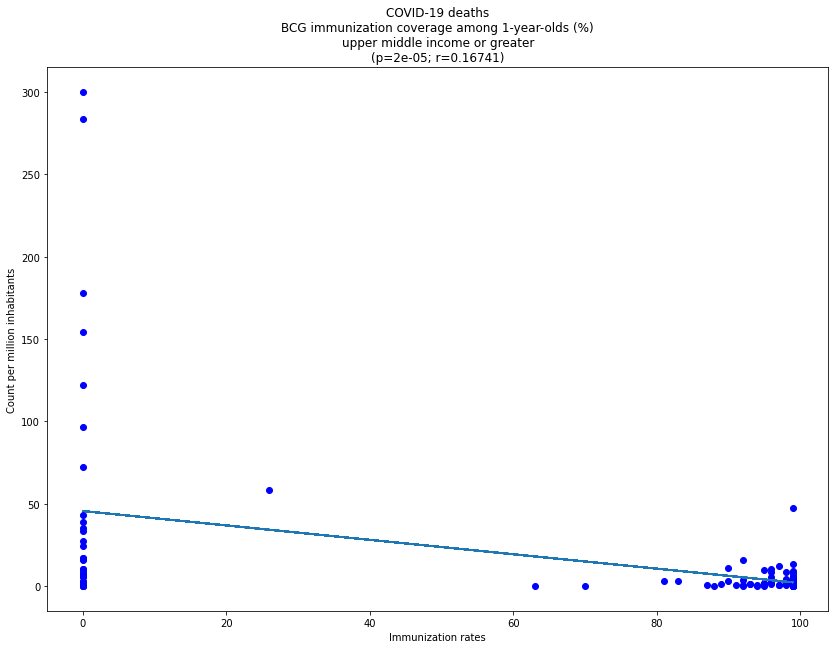

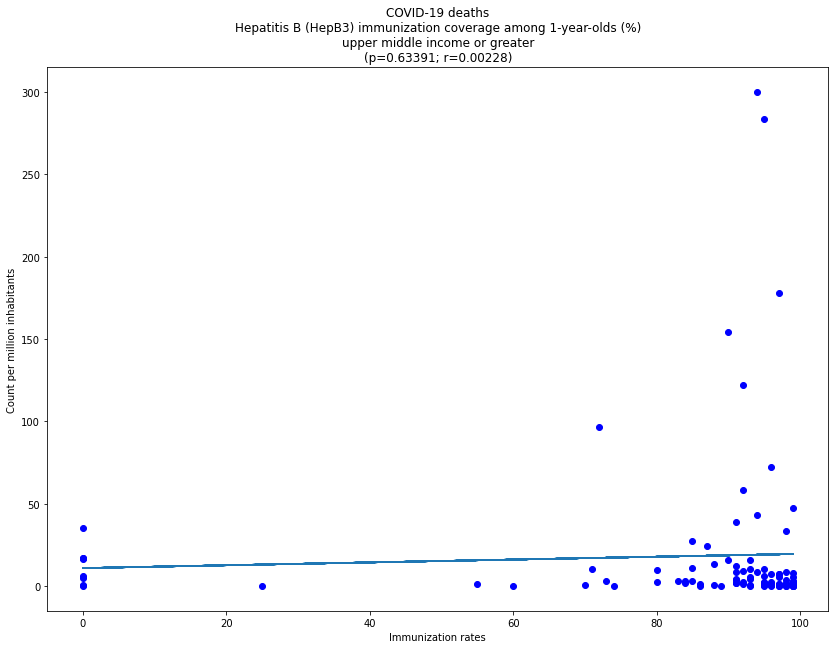

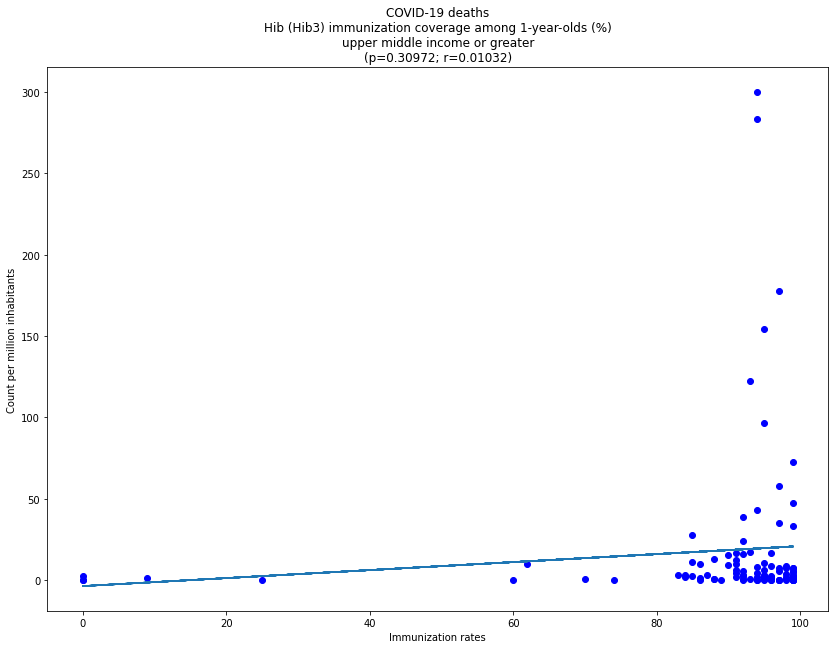

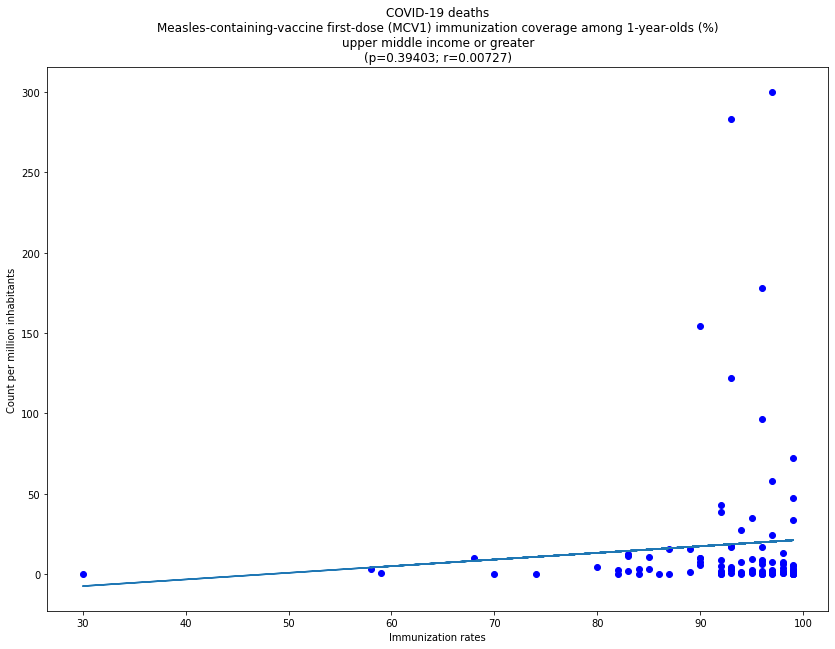

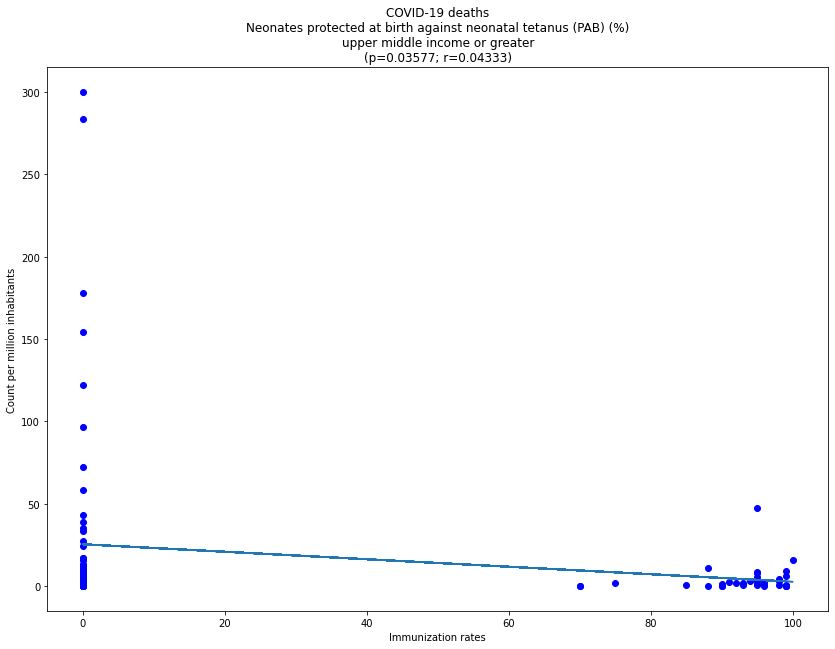

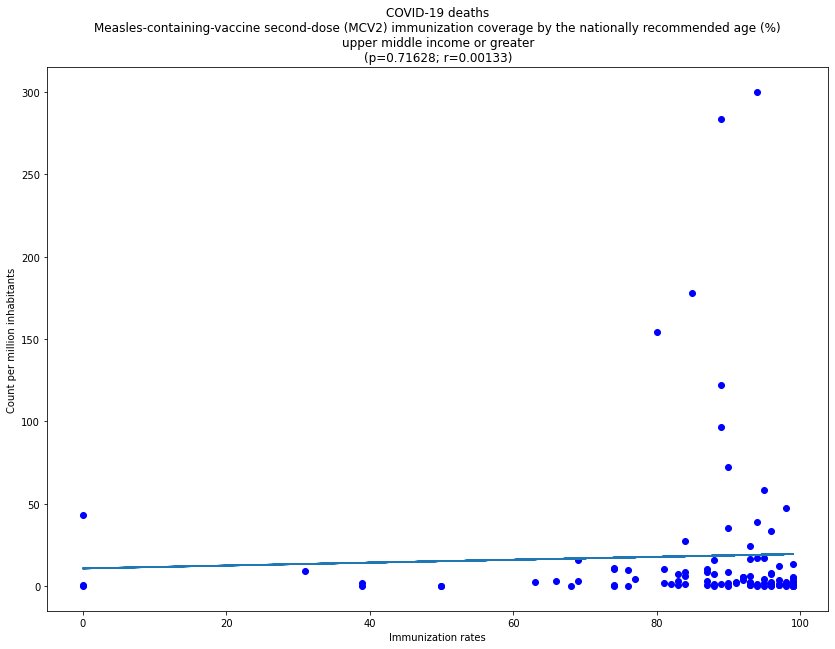

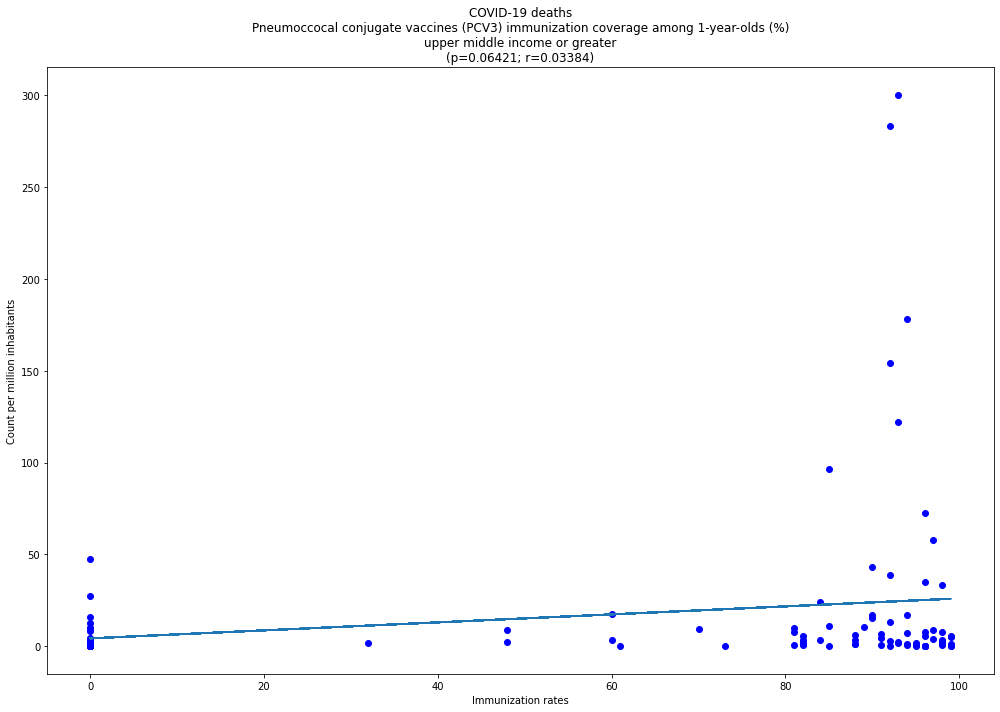

In [55]:
plot_cases(read_global_deaths(), {
    "title": "COVID-19 deaths",
    "income_threshold": "upper middle income",
    "strategy": "population",
    'threshold': 10,
    "max_days_beyond_threshold": 300,
})

Population not found for country: Holy See
Population not found for country: Taiwan, China
Population not found for country: MS Zaandam
Population not found for country: Western Sahara
Population not found for country: Holy See
Population not found for country: Taiwan, China
Population not found for country: MS Zaandam
Population not found for country: Western Sahara
Population not found for country: Holy See
Population not found for country: Taiwan, China
Population not found for country: MS Zaandam
Population not found for country: Western Sahara
Population not found for country: Holy See
Population not found for country: Taiwan, China
Population not found for country: MS Zaandam
Population not found for country: Western Sahara
Population not found for country: Holy See
Population not found for country: Taiwan, China
Population not found for country: MS Zaandam
Population not found for country: Western Sahara
Population not found for country: Holy See
Population not found for country

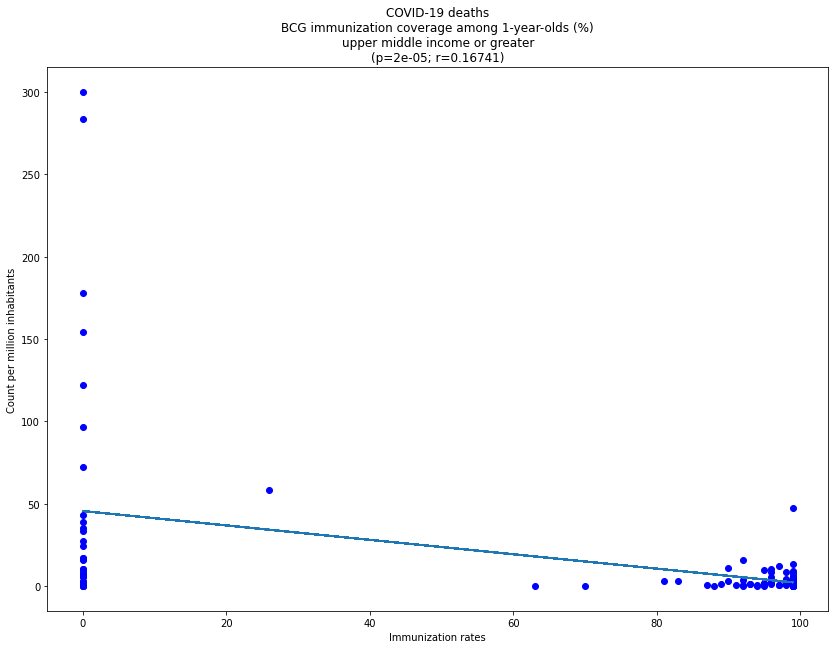

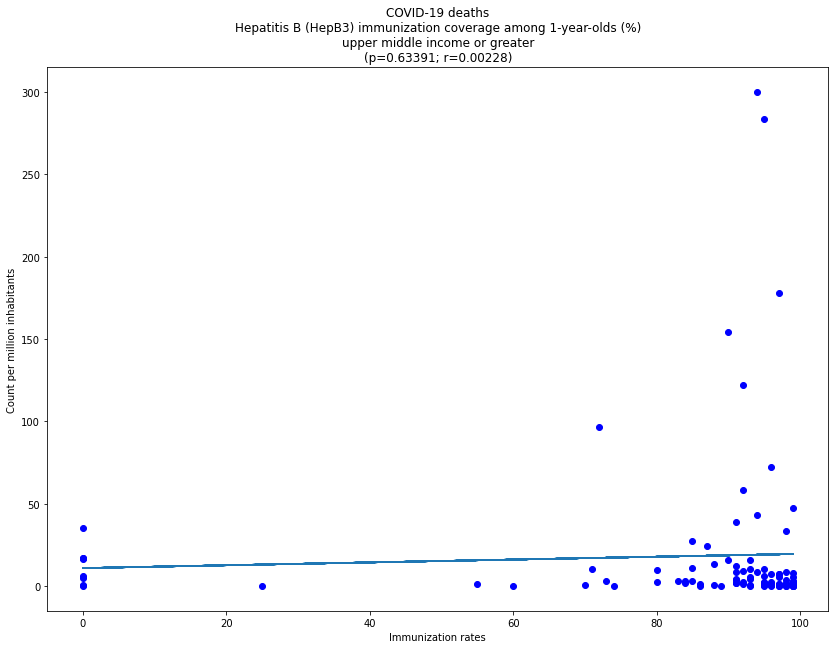

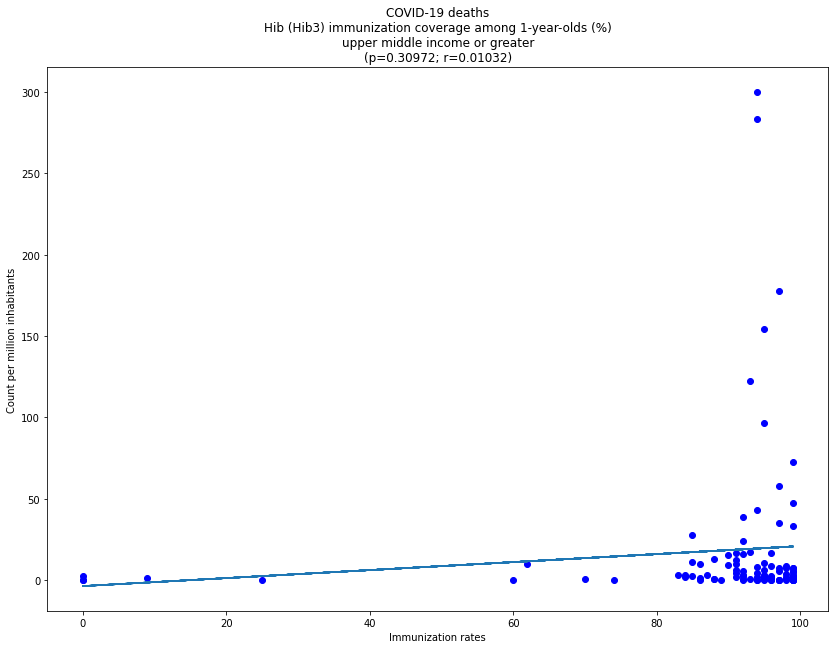

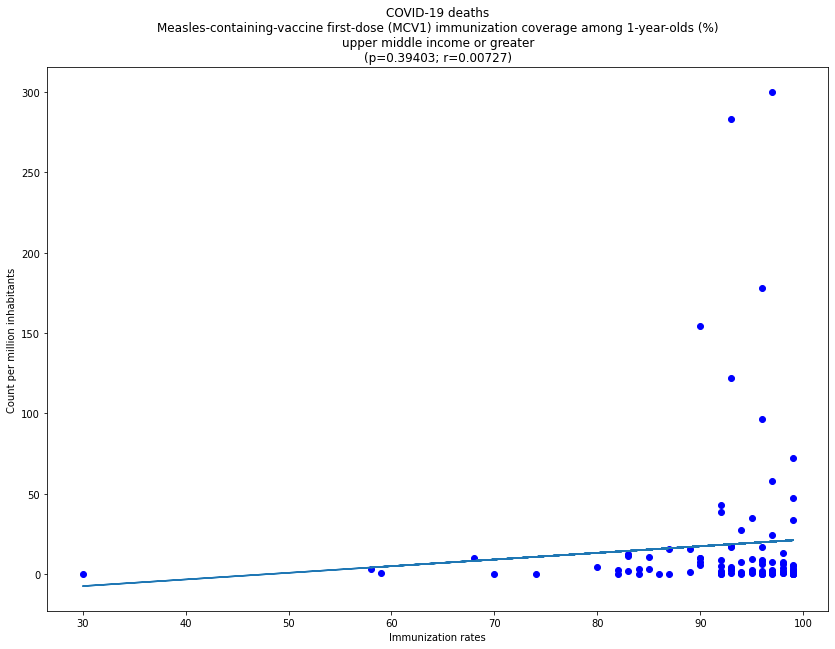

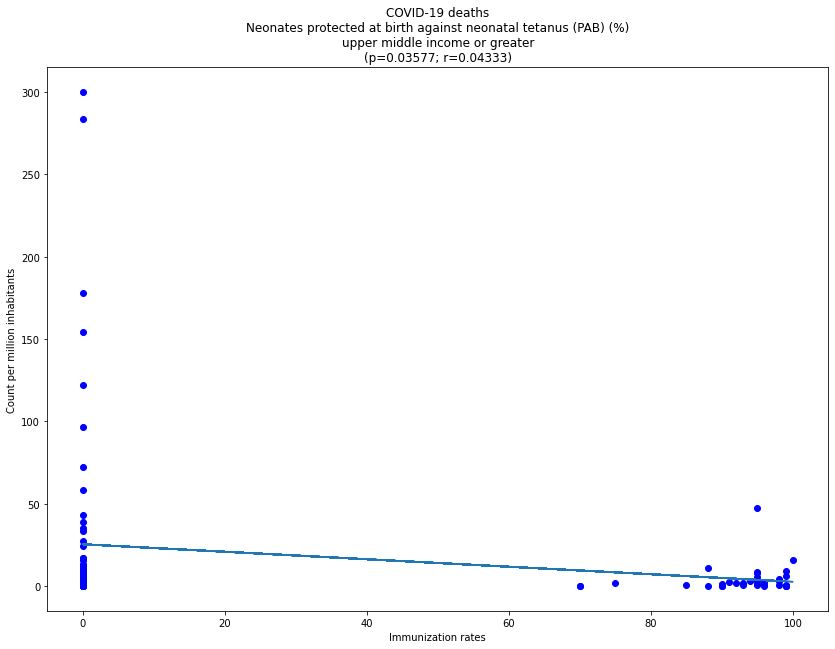

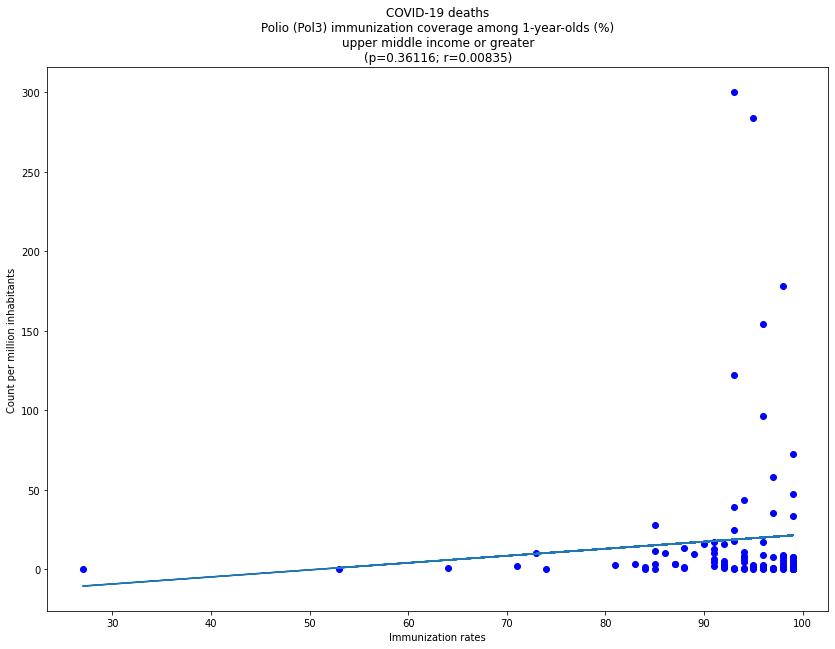

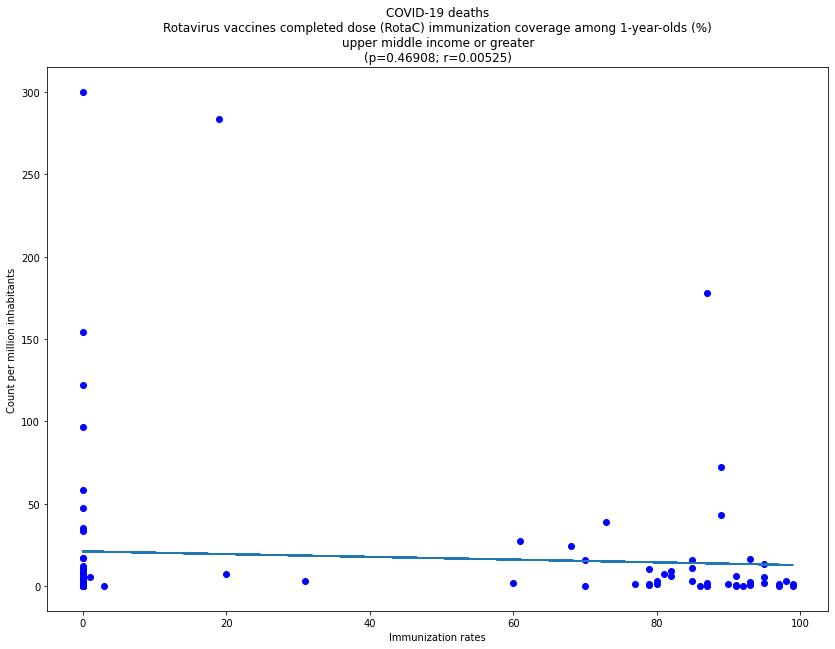

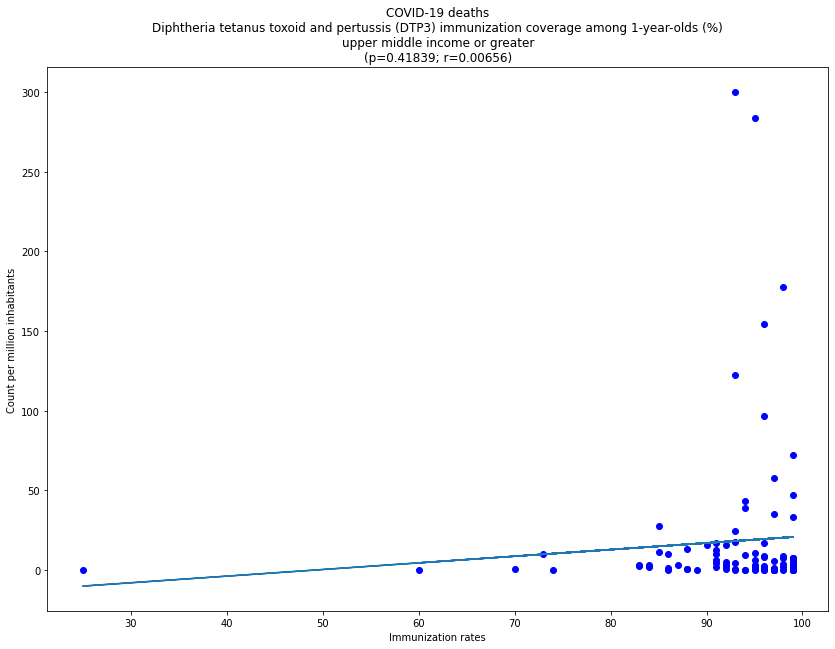

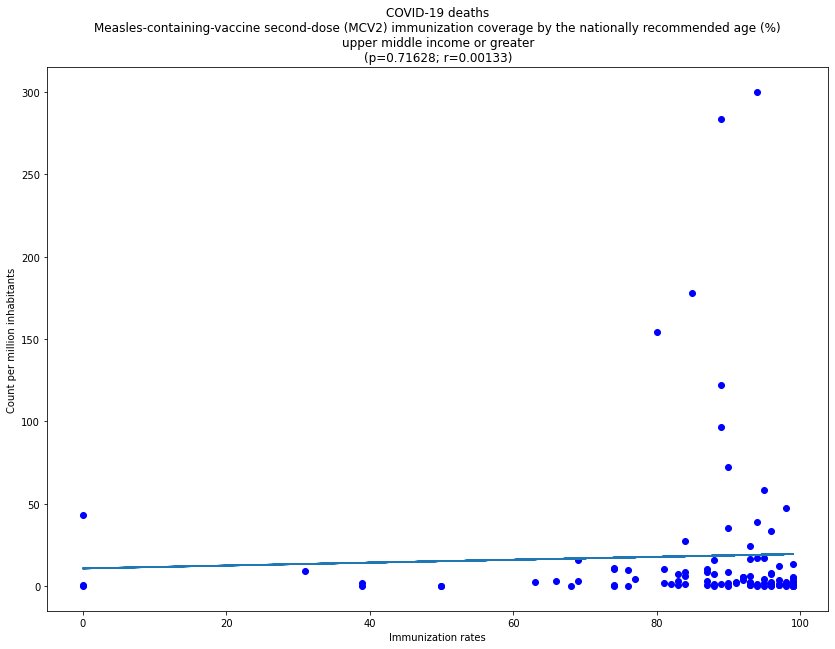

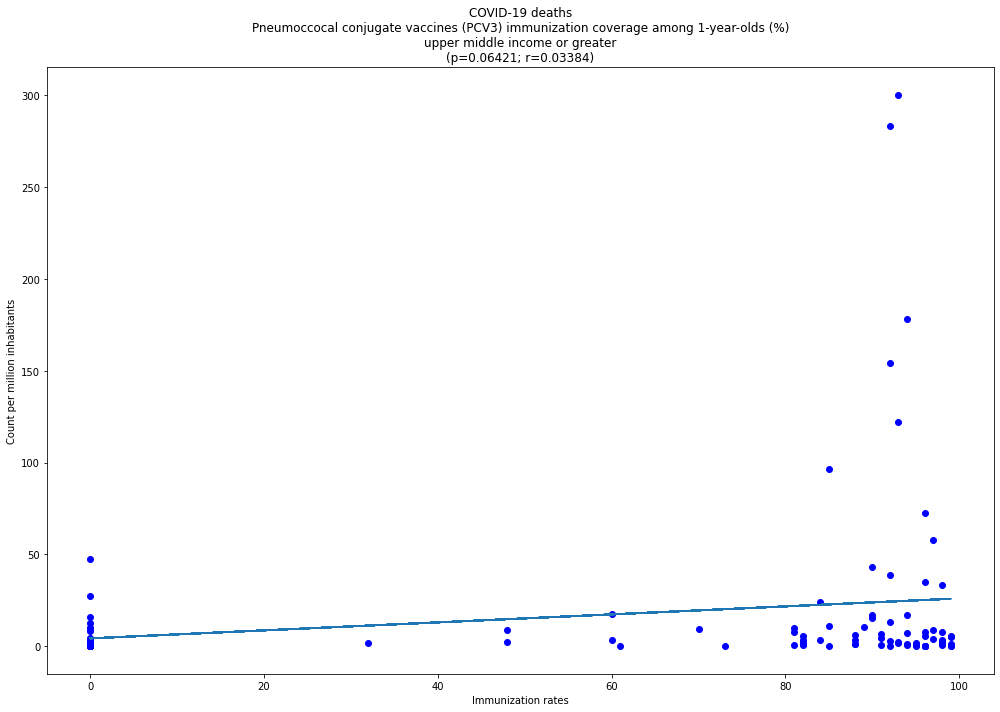

In [56]:
plot_cases(read_global_deaths(), {
    "title": "COVID-19 deaths",
    "threshold": 10,
    "income_threshold": "upper middle income",
    "strategy": "population"
})

# Utilities for calculating outbreak start

In [57]:
def index_of_first(vs, pred):
    for i,v in enumerate(vs):
        if pred(v):
            return i
    return None

def days_to_nth_case(cases, options):
    nth_case = options['nth_case']
    result = {}
    for country,counts in cases.items():
        idx = index_of_first(counts, lambda n: n >= nth_case)
        if idx is not None:
            result[country] = idx
    return result

days_to_nth_case(read_global_cases(), {'nth_case': 100})

{'Afghanistan': 65,
 'Albania': 61,
 'Algeria': 59,
 'Andorra': 60,
 'Argentina': 58,
 'Armenia': 57,
 'Australia': 48,
 'Austria': 46,
 'Azerbaijan': 64,
 'Bahrain': 48,
 'Bangladesh': 75,
 'Belarus': 68,
 'Belgium': 44,
 'Bolivia (Plurinational State of)': 69,
 'Bosnia and Herzegovina': 60,
 'Brazil': 51,
 'Brunei Darussalam': 62,
 'Bulgaria': 58,
 'Burkina Faso': 62,
 'Cambodia': 67,
 'Cameroon': 67,
 'Canada': 49,
 'Chile': 54,
 'China': 0,
 'Colombia': 57,
 'Democratic Republic of the Congo': 70,
 'Costa Rica': 59,
 "Côte d'Ivoire": 65,
 'Croatia': 57,
 'Cuba': 66,
 'Cyprus': 61,
 'Czechia': 51,
 'Denmark': 48,
 'Dominican Republic': 59,
 'Ecuador': 56,
 'Egypt': 52,
 'Estonia': 52,
 'Finland': 51,
 'France': 38,
 'Georgia': 68,
 'Germany': 39,
 'Ghana': 64,
 'Greece': 51,
 'Guinea': 73,
 'Honduras': 67,
 'Hungary': 59,
 'Iceland': 50,
 'India': 52,
 'Indonesia': 53,
 'Iran (Islamic Republic of)': 35,
 'Iraq': 51,
 'Ireland': 52,
 'Israel': 50,
 'Italy': 32,
 'Japan': 30,
 'Jordan

# Plotting of outbreak start by immunization level

In [58]:
import statistics

def plot_outbreak_start(cases, options = {}):
    options = {**default_options, **options}
    days_to_by_country = days_to_nth_case(cases, options)
    for vacc, immunization_rates_by_country in immunization_rates_by_country_by_vaccination().items():
        fig, ax = plt.subplots()
        fig.set_size_inches(14,10)
        immunization_rates_ordered, days_to_ordered = group_rates_by_country(
            days_to_by_country,
            immunization_rates_by_country,
            options)
        X = sm.add_constant([[x] for x in immunization_rates_ordered])
        fit = sm.OLS(days_to_ordered, X).fit()
        #print(fit.summary())
        plt.title(options['title'] + "\n" +
                  vacc + "\n(p=" + str(round(fit.pvalues[1],5)) +
                  "; r=" + str(round(fit.rsquared,5)) + ")")
        plt.xlabel("Immunization rates")
        if options['strategy'] == 'rate':
            plt.ylabel("Days to outbreak underway")        
        ax.plot(immunization_rates_ordered, days_to_ordered, 'bo')
        ax.plot(immunization_rates_ordered, [fit.params[1] * rate + fit.params[0] for rate in immunization_rates_ordered])
    plt.tight_layout()
    plt.show()

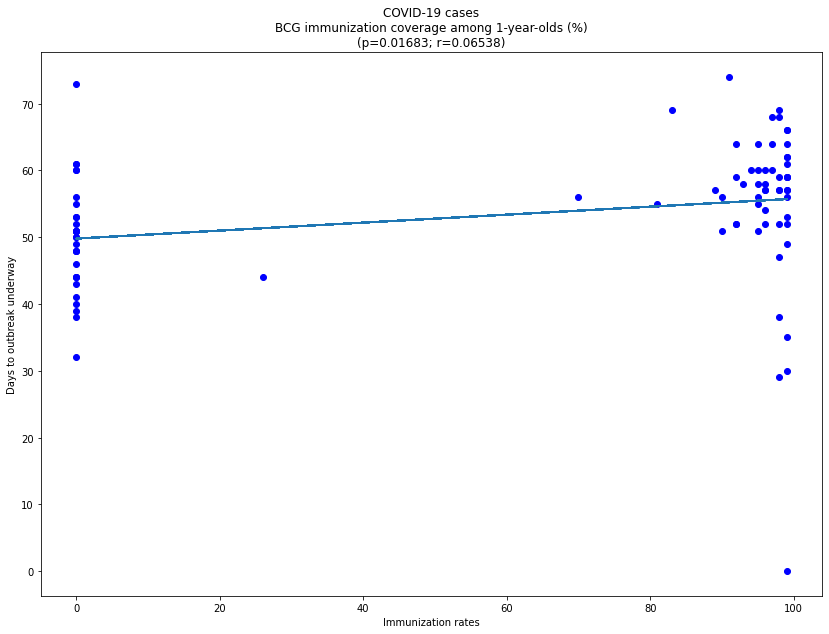

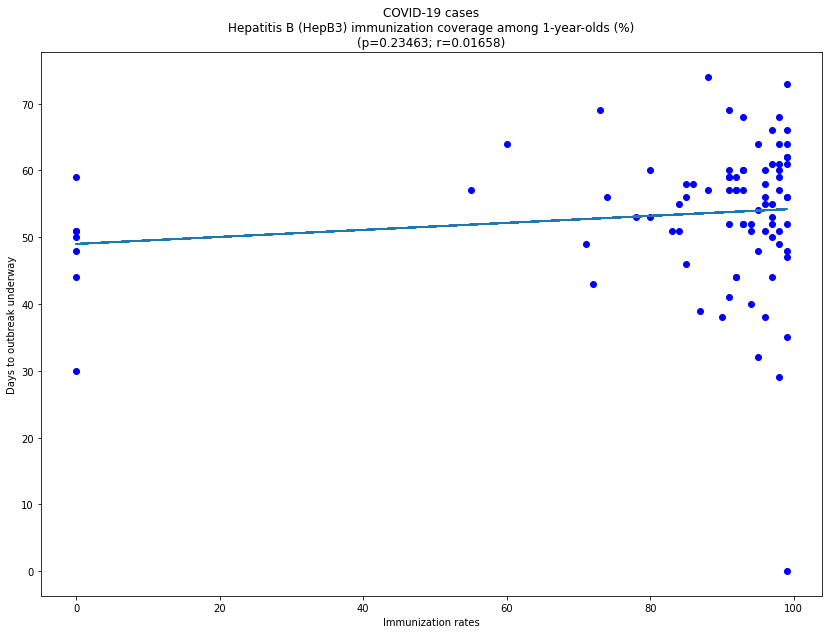

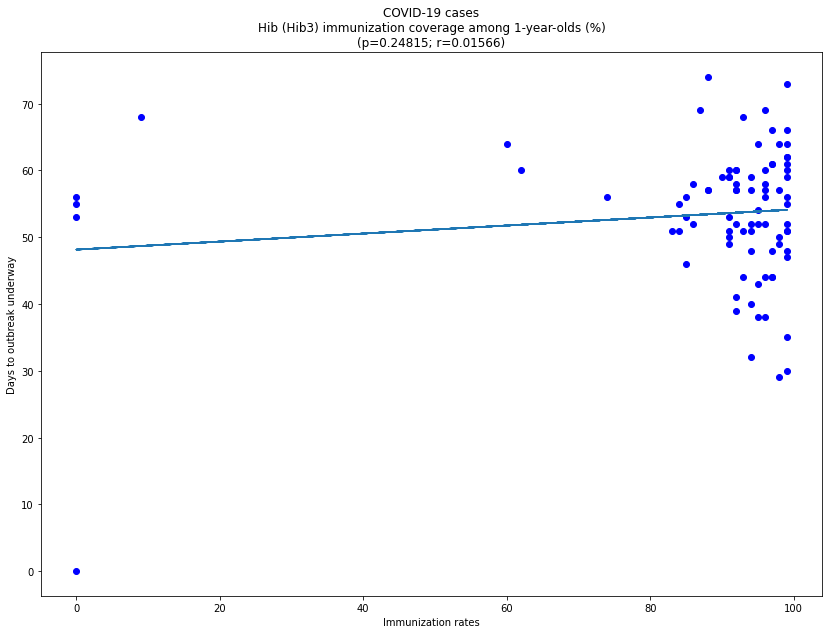

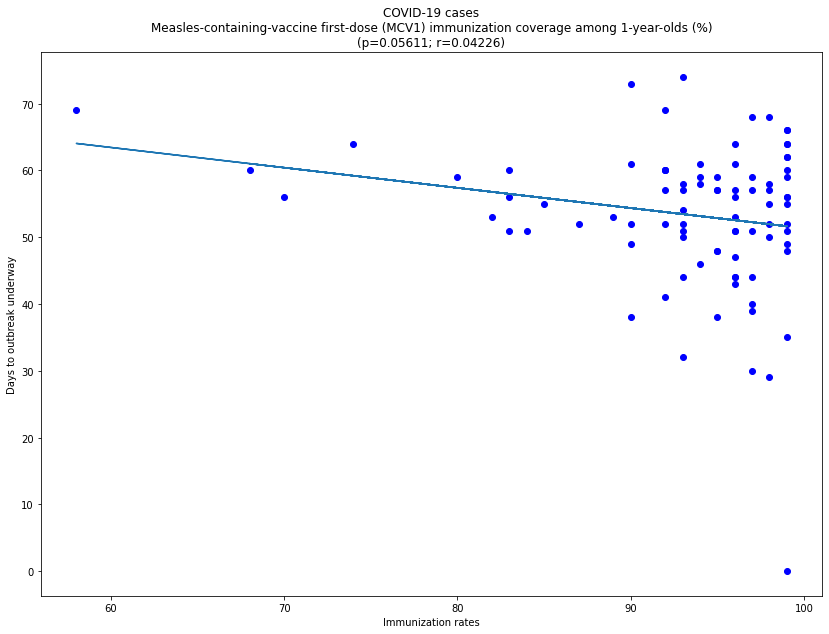

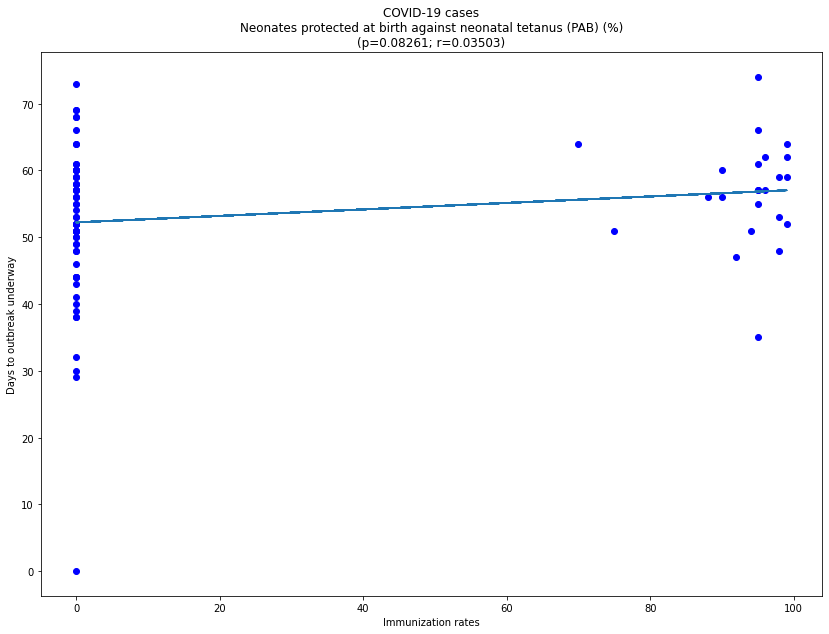

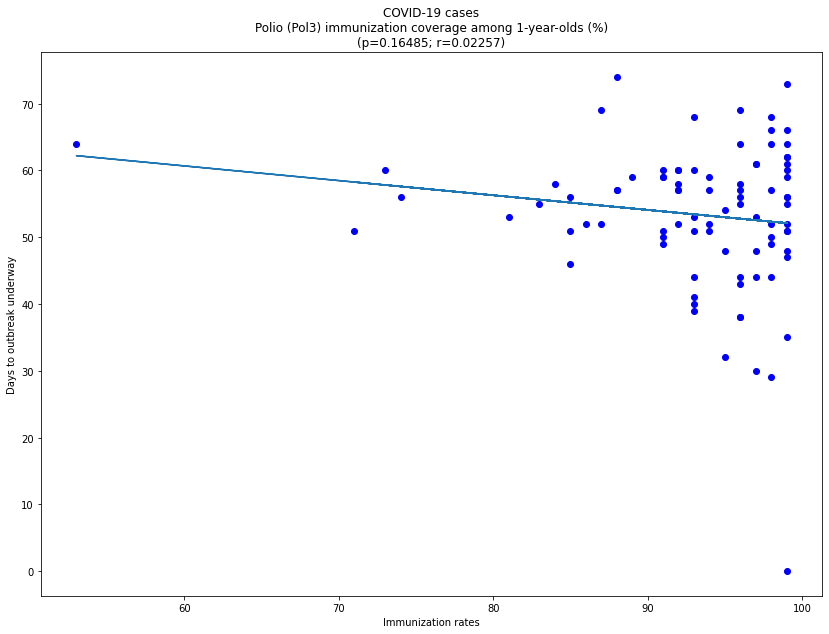

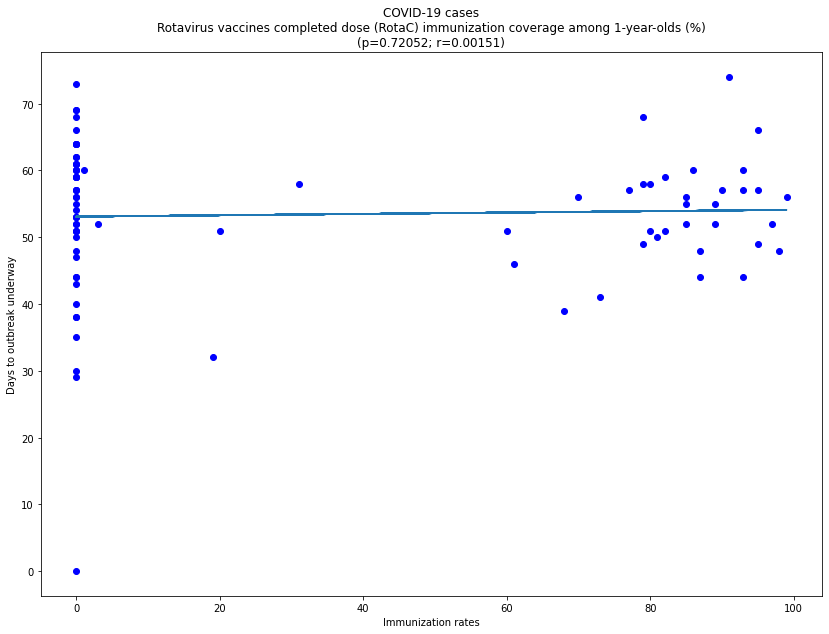

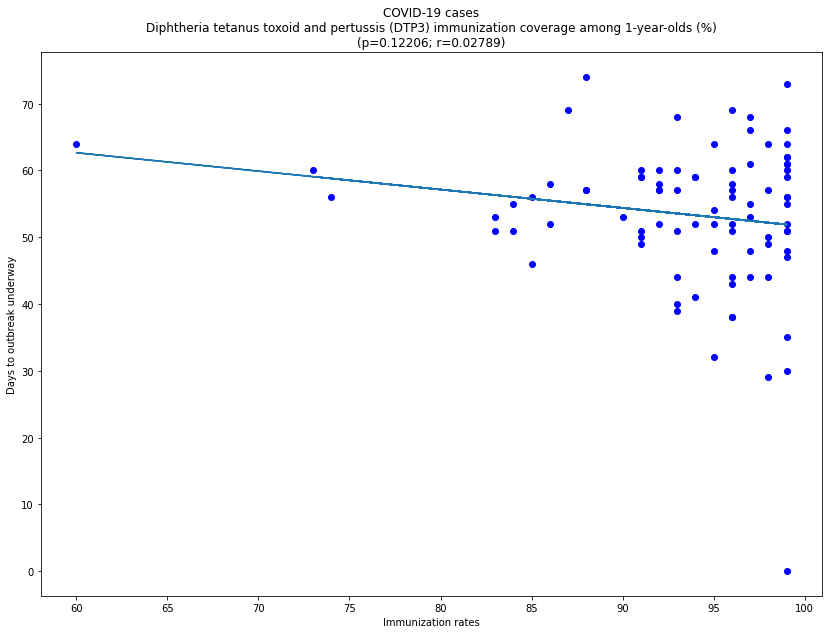

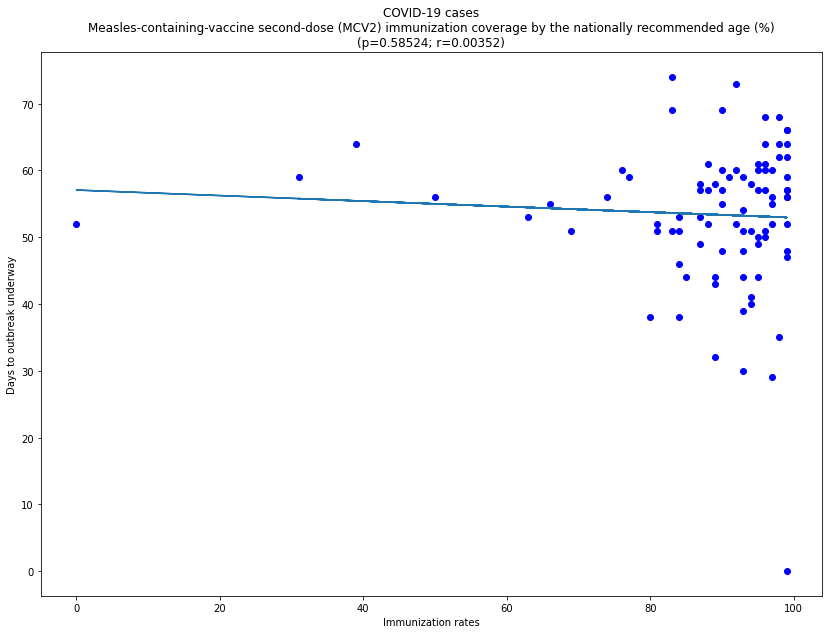

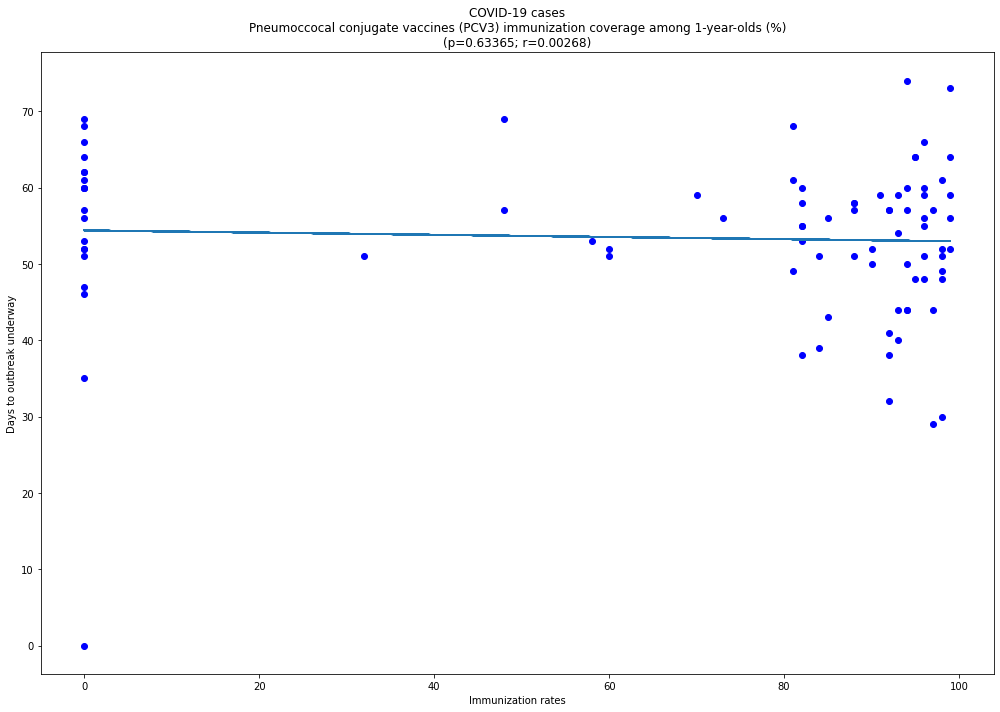

In [59]:
plot_outbreak_start(read_global_cases(), {
    "title": "COVID-19 cases",
    "income_threshold": "upper middle income",
    "nth_case": 100
})

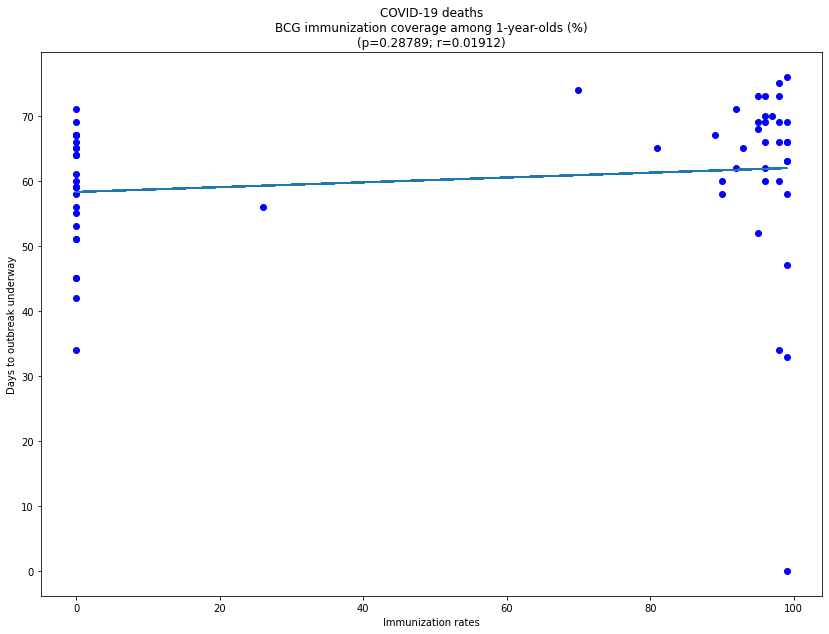

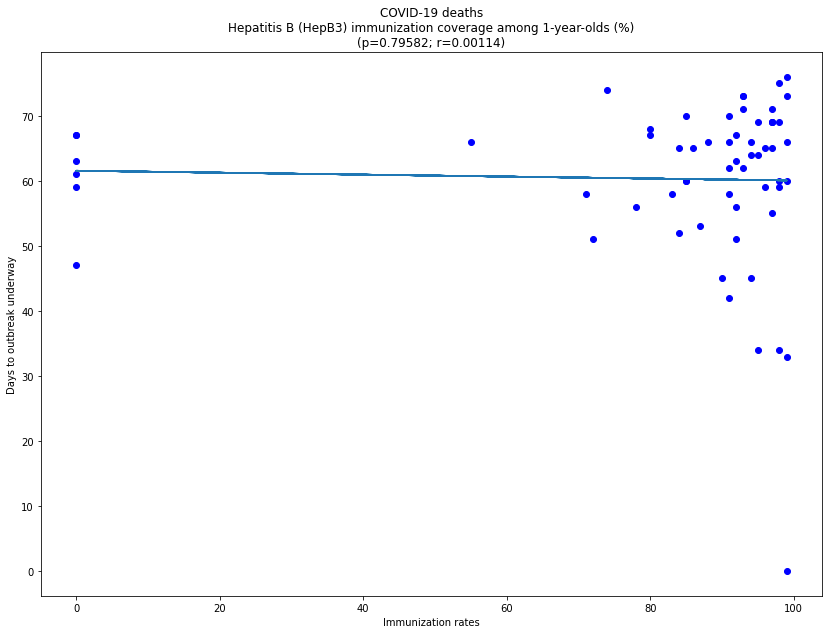

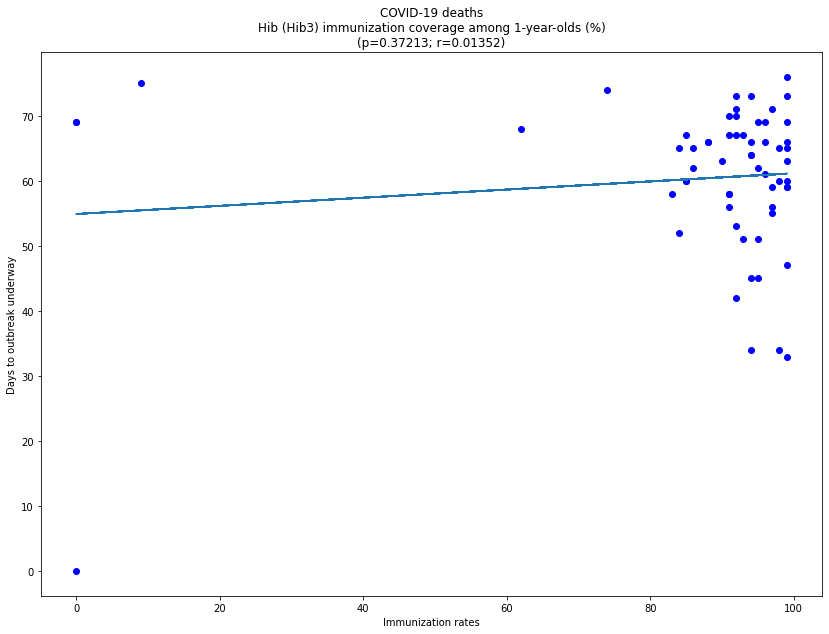

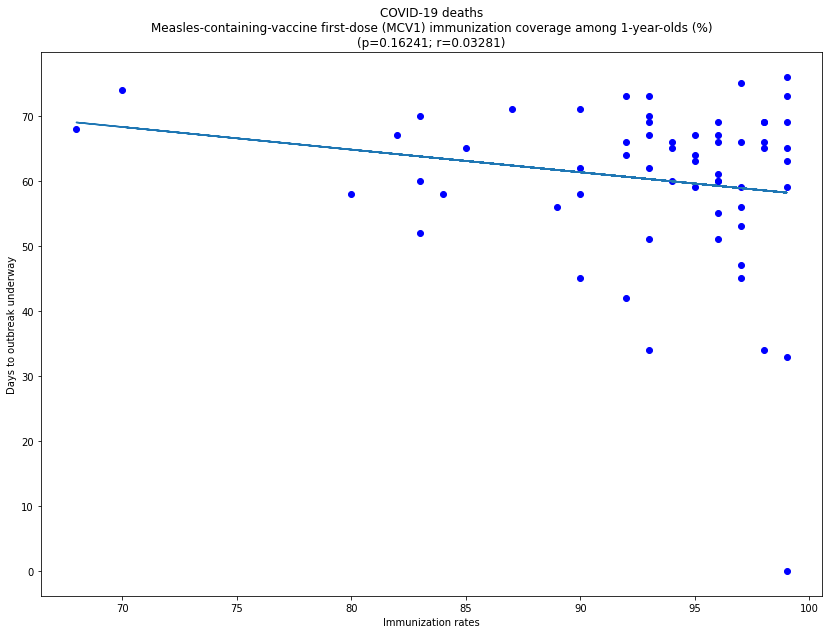

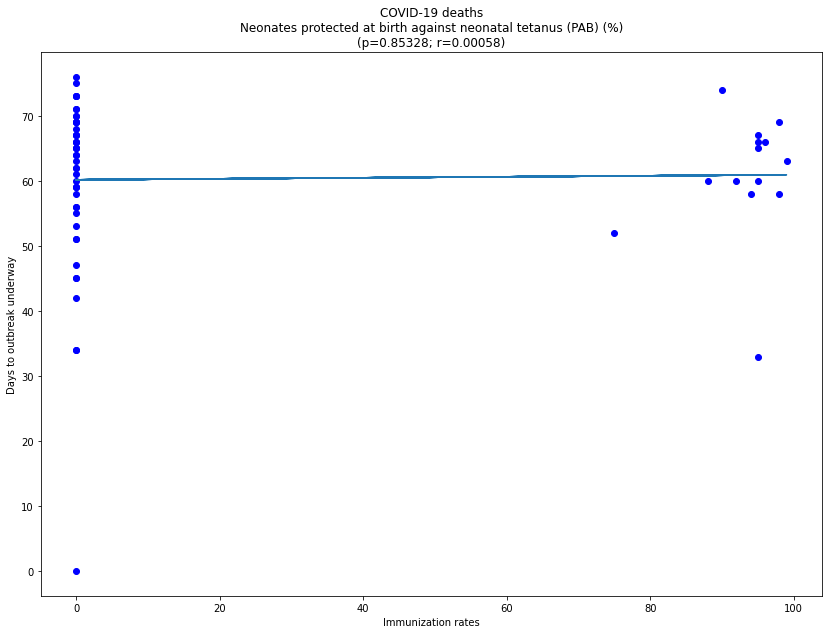

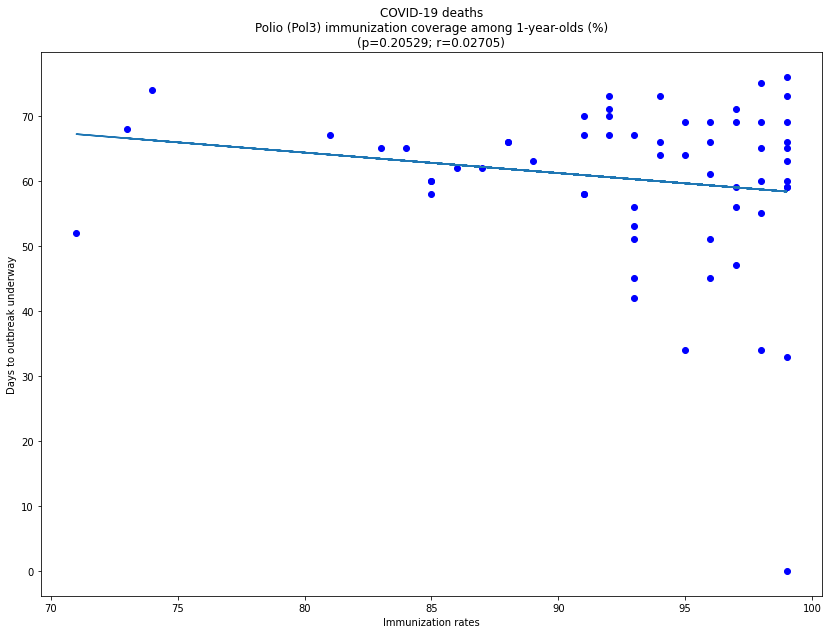

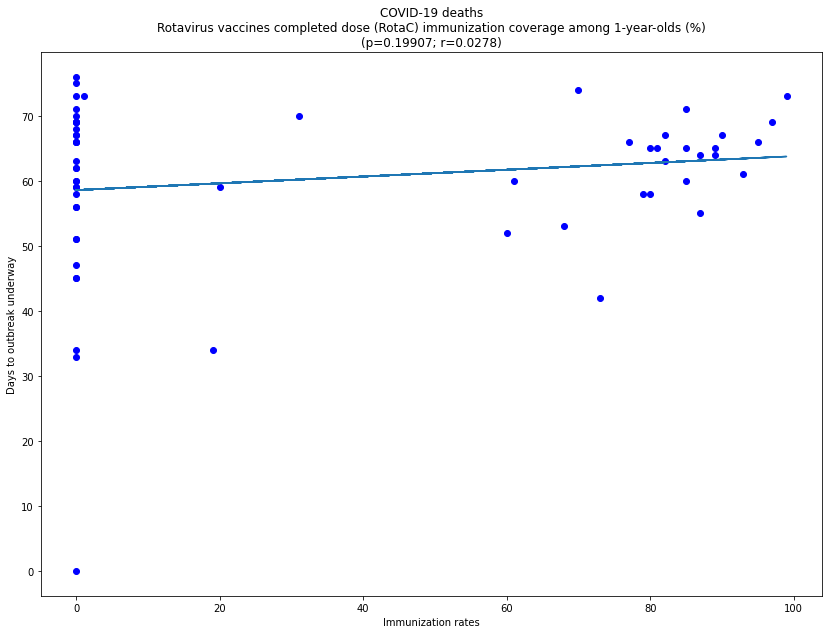

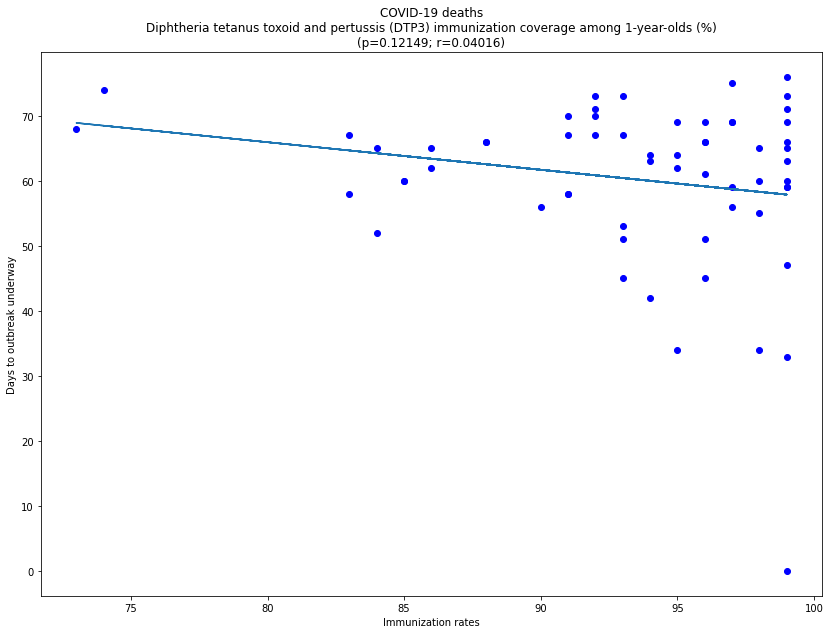

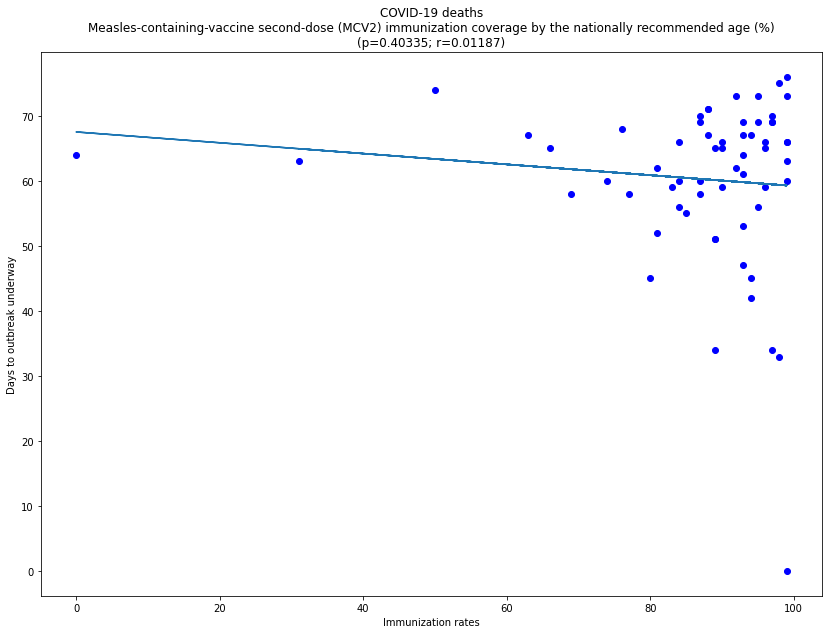

In [60]:
plot_outbreak_start(read_global_deaths(), {
    "title": "COVID-19 deaths",
    "income_threshold": "upper middle income",
    "nth_case": 10
})

# Average outbreak start delay for high- and low-immunization countries

In [61]:
def average_by_immunization_rates(cases, options = {}):
    options = {**default_options, **options}
    # China doesn't count.
    del cases['China']
    days_to_by_country = days_to_nth_case(cases, options)
    for vacc, immunization_rates_by_country in immunization_rates_by_country_by_vaccination().items():
        immunization_rates_ordered, days_to_ordered = group_rates_by_country(
            days_to_by_country,
            immunization_rates_by_country,
            options)
        buckets = [[], []]
        for i in range(len(immunization_rates_ordered)):
            if immunization_rates_ordered[i] < 0.50:
                buckets[0].append(days_to_ordered[i])
            else:
                buckets[1].append(days_to_ordered[i])
        print(vacc)
        if len(buckets[0]):
            print("Average days for low immunization: " + str(statistics.mean(buckets[0])))
        else:
            print("Average days for low immunization: N/A")
        print("Average days for high immunization: " + str(statistics.mean(buckets[1])))
  
average_by_immunization_rates(read_global_cases(), {
    "title": "COVID-19 cases",
    "income_threshold": "upper middle income",
    "nth_case": 100
})

BCG immunization coverage among 1-year-olds (%)
Average days for low immunization: 49.774193548387096
Average days for high immunization: 56.43636363636364
Hepatitis B (HepB3) immunization coverage among 1-year-olds (%)
Average days for low immunization: 47.57142857142857
Average days for high immunization: 54.607594936708864
Hib (Hib3) immunization coverage among 1-year-olds (%)
Average days for low immunization: 54.666666666666664
Average days for high immunization: 54.01204819277108
Measles-containing-vaccine first-dose (MCV1) immunization coverage among 1-year-olds (%)
Average days for low immunization: N/A
Average days for high immunization: 54.03488372093023
Neonates protected at birth against neonatal tetanus (PAB) (%)
Average days for low immunization: 53.03174603174603
Average days for high immunization: 56.78260869565217
Polio (Pol3) immunization coverage among 1-year-olds (%)
Average days for low immunization: N/A
Average days for high immunization: 54.03488372093023
Rotavir

# Average case growth rate for high- and low-immunization countries

In [62]:
def average_by_growth_rate(cases, options = {}):
    options = {**default_options, **options}
    for vacc, immunization_rates_by_country in immunization_rates_by_country_by_vaccination().items():
        options['vaccination'] = vacc
        growth_rates_by_country = calculate_growth_rates_by_country(cases, options)
        immunization_rates_ordered, growth_rate_ordered = group_rates_by_country(
            growth_rates_by_country,
            immunization_rates_by_country,
            options)
        buckets = [[], []]
        for i in range(len(immunization_rates_ordered)):
            if immunization_rates_ordered[i] < 0.50:
                buckets[0].append(growth_rate_ordered[i])
            else:
                buckets[1].append(growth_rate_ordered[i])
        print(vacc)
        if len(buckets[0]):
            print("Average growth for low immunization: " + str(statistics.mean(buckets[0])))
        else:
            print("Average growth for low immunization: N/A")
        print("Average growth for high immunization: " + str(statistics.mean(buckets[1])))
  
average_by_growth_rate(read_global_cases(), {
    "title": "COVID-19 cases",
    "income_threshold": "high income",
    "nth_case": 100
})

BCG immunization coverage among 1-year-olds (%)
Average growth for low immunization: 1.149948611822159
Average growth for high immunization: 1.1193850666037206
Hepatitis B (HepB3) immunization coverage among 1-year-olds (%)
Average growth for low immunization: 1.1136150622634138
Average growth for high immunization: 1.1421778377212277
Hib (Hib3) immunization coverage among 1-year-olds (%)
Average growth for low immunization: N/A
Average growth for high immunization: 1.1380974412272542
Measles-containing-vaccine first-dose (MCV1) immunization coverage among 1-year-olds (%)
Average growth for low immunization: N/A
Average growth for high immunization: 1.1380974412272542
Neonates protected at birth against neonatal tetanus (PAB) (%)
Average growth for low immunization: 1.1438346981567646
Average growth for high immunization: 1.073553300770263
Polio (Pol3) immunization coverage among 1-year-olds (%)
Average growth for low immunization: N/A
Average growth for high immunization: 1.1380974412

# Immunization rates by country population

Population not found for country: Taiwan, China
Population not found for country: Cook Islands
Population not found for country: Democratic People's Republic of Korea
Population not found for country: Niue
Population not found for country: Taiwan, China
Population not found for country: Cook Islands
Population not found for country: Democratic People's Republic of Korea
Population not found for country: Niue
Population not found for country: Taiwan, China
Population not found for country: Cook Islands
Population not found for country: Democratic People's Republic of Korea
Population not found for country: Niue
Population not found for country: Taiwan, China
Population not found for country: Cook Islands
Population not found for country: Democratic People's Republic of Korea
Population not found for country: Niue
Population not found for country: Taiwan, China
Population not found for country: Cook Islands
Population not found for country: Democratic People's Republic of Korea
Populatio

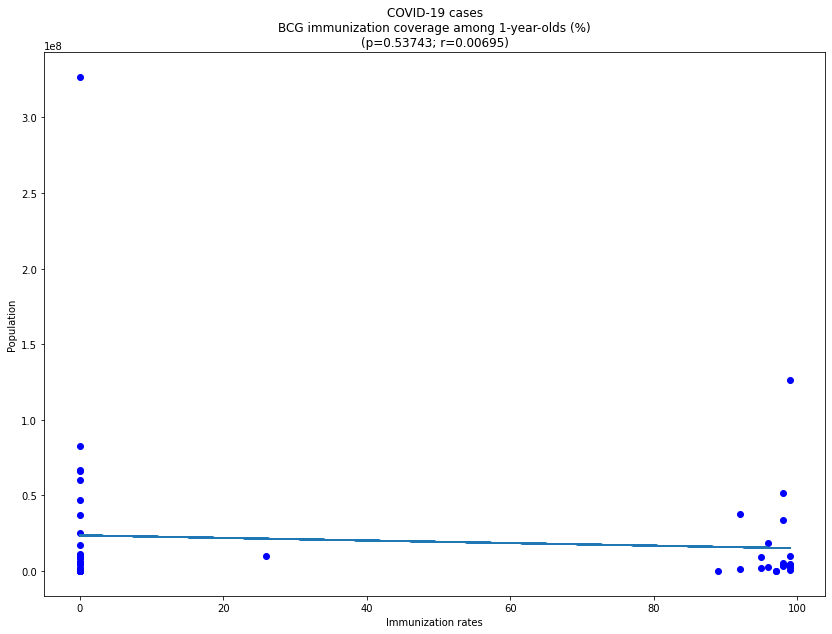

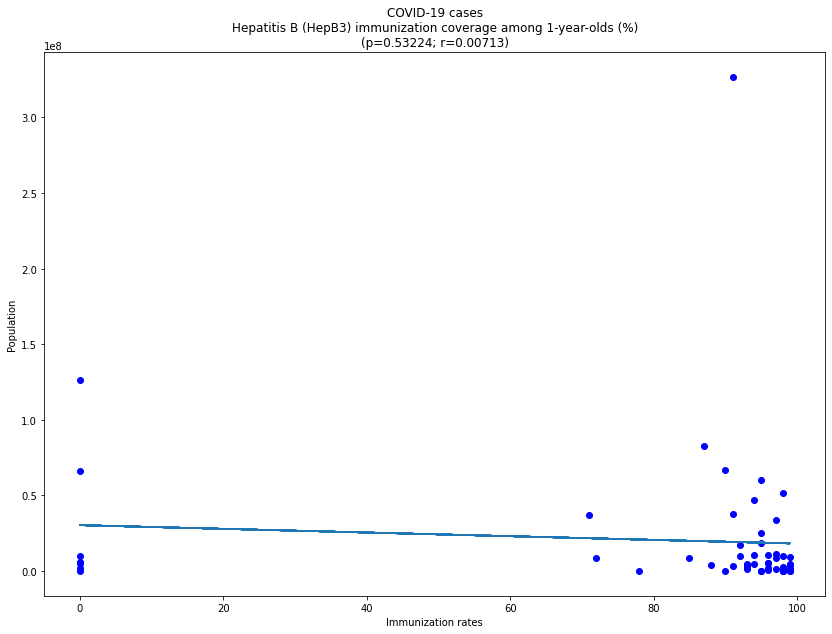

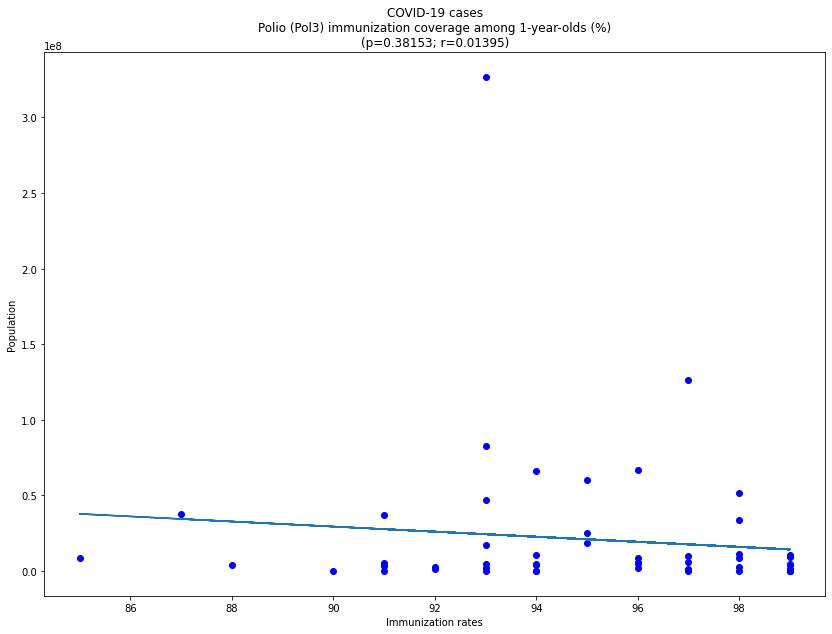

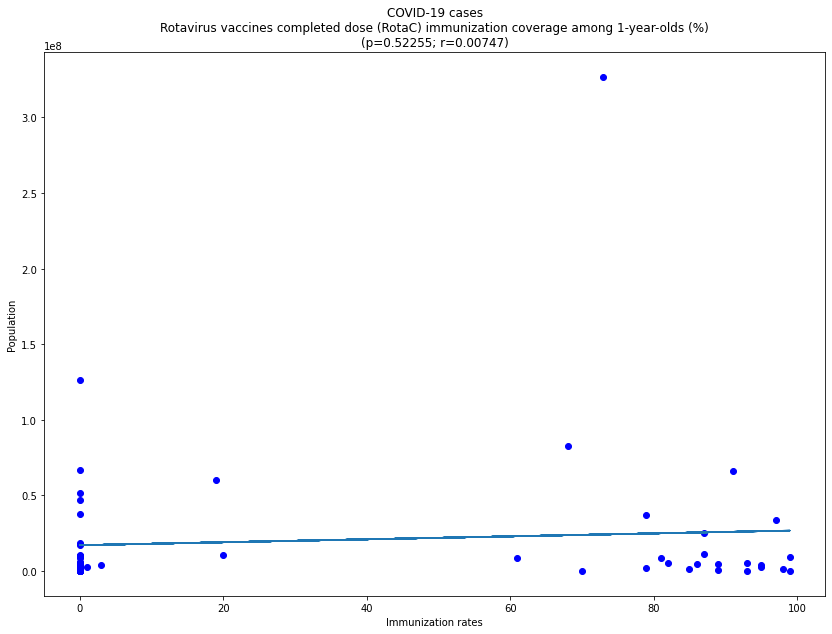

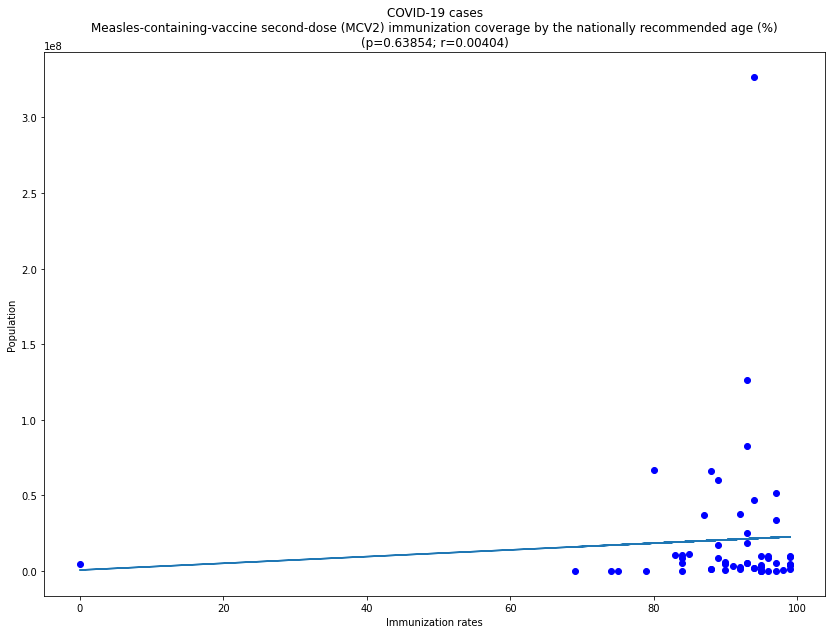

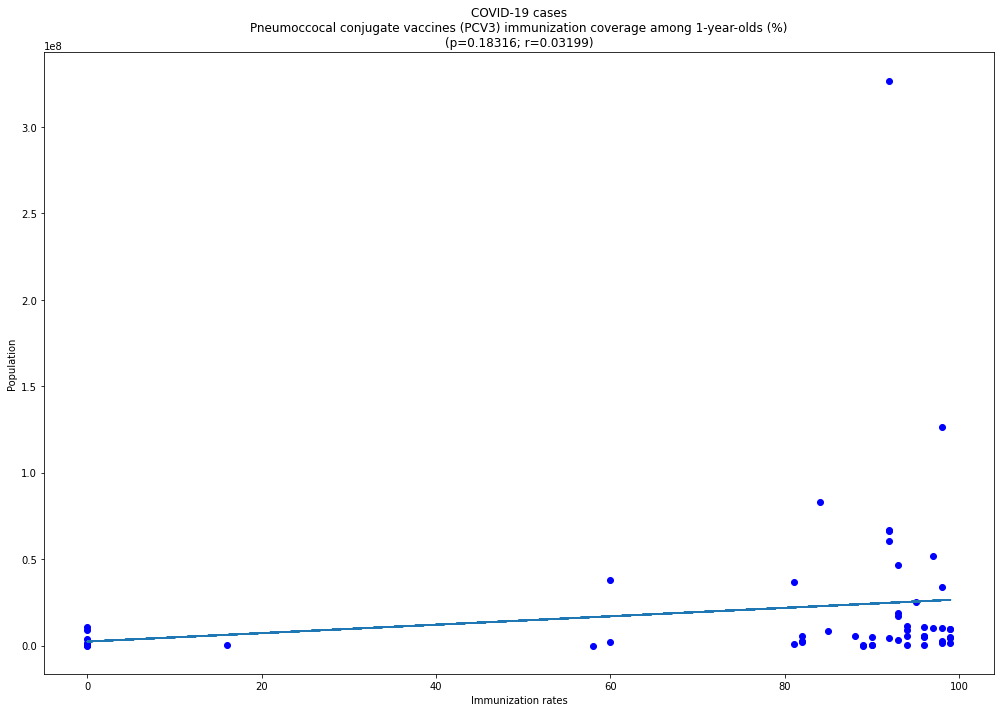

In [63]:
import statistics

def immunization_by_population(cases, options = {}):
    options = {**default_options, **options}
    for vacc, immunization_rates_by_country in immunization_rates_by_country_by_vaccination().items():
        fig, ax = plt.subplots()
        fig.set_size_inches(14,10)
        population_ordered = [get_country_population(country) for country,rate in immunization_rates_by_country.items() if get_country_population(country) and meets_income_threshold(country, options)]
        immunization_rates_ordered = [rate for country,rate in immunization_rates_by_country.items() if get_country_population(country) and meets_income_threshold(country, options)]
        X = sm.add_constant([[x] for x in immunization_rates_ordered])
        fit = sm.OLS(population_ordered, X).fit()
        #print(fit.summary())
        plt.title(options['title'] + "\n" +
                  vacc + "\n(p=" + str(round(fit.pvalues[1],5)) +
                  "; r=" + str(round(fit.rsquared,5)) + ")")
        plt.xlabel("Immunization rates")
        if options['strategy'] == 'rate':
            plt.ylabel("Population")        
        ax.plot(immunization_rates_ordered, population_ordered, 'bo')
        ax.plot(immunization_rates_ordered, [fit.params[1] * rate + fit.params[0] for rate in immunization_rates_ordered])
    plt.tight_layout()
    plt.show()
    
immunization_by_population(read_global_cases(), {
    "title": "COVID-19 cases",
    "income_threshold": "high income",
    "nth_case": 100
})

# Plot international arrivals by immunization rates

No data for American Samoa
No data for Aruba
No data for Bermuda
No data for British Virgin Islands
No data for Cayman Islands
No data for Channel Islands
Income group not found for Curacao
No data for Faroe Islands
No data for French Polynesia
No data for Gibraltar
No data for Greenland
No data for Guam
No data for Hong Kong SAR, China
No data for Isle of Man
Income group not found for Korea, Dem. People’s Rep.
No data for Liechtenstein
No data for Macao SAR, China
No data for New Caledonia
No data for Northern Mariana Islands
No data for Puerto Rico
No data for Sint Maarten (Dutch part)
No data for St. Martin (French part)
No data for Turks and Caicos Islands
No data for Virgin Islands (U.S.)
No data for American Samoa
No data for Aruba
No data for Bermuda
No data for British Virgin Islands
No data for Cayman Islands
No data for Channel Islands
Income group not found for Curacao
No data for Faroe Islands
No data for French Polynesia
No data for Gibraltar
No data for Greenland
No data

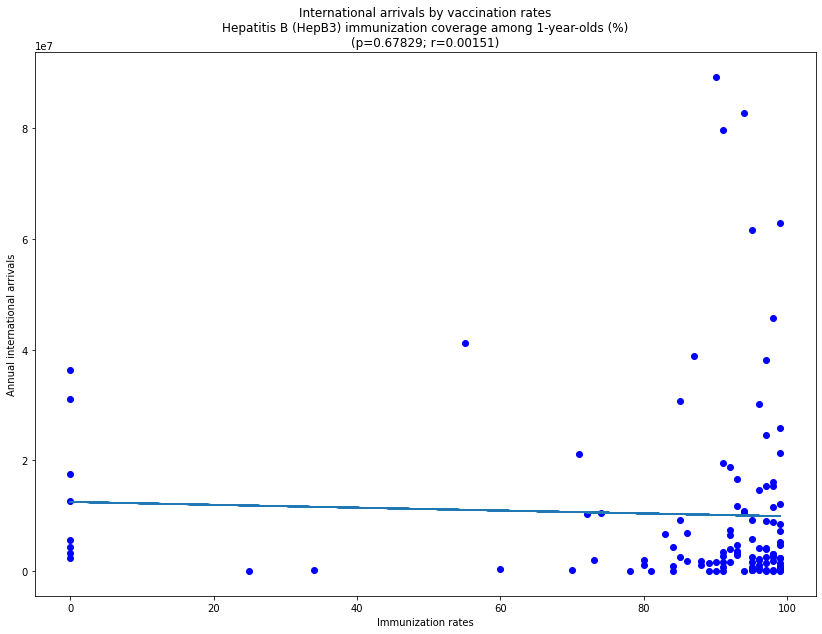

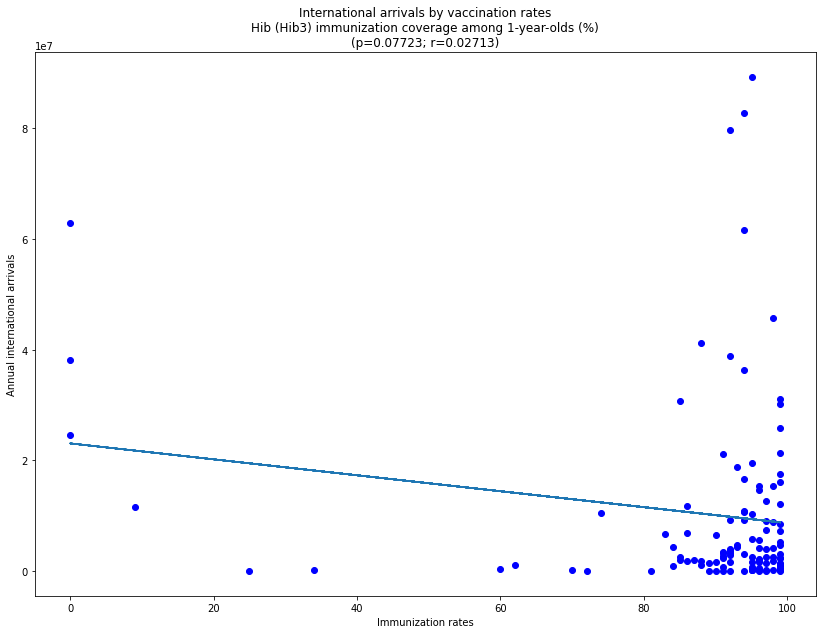

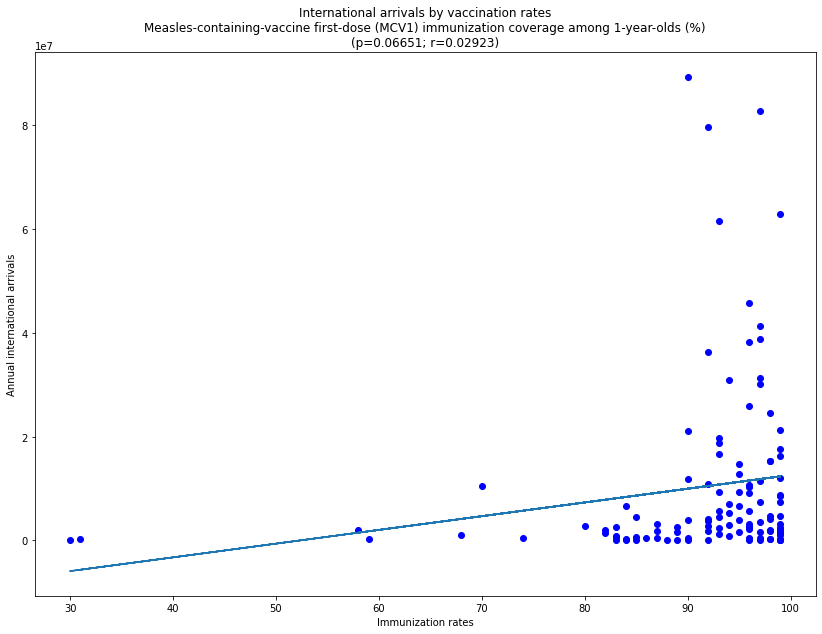

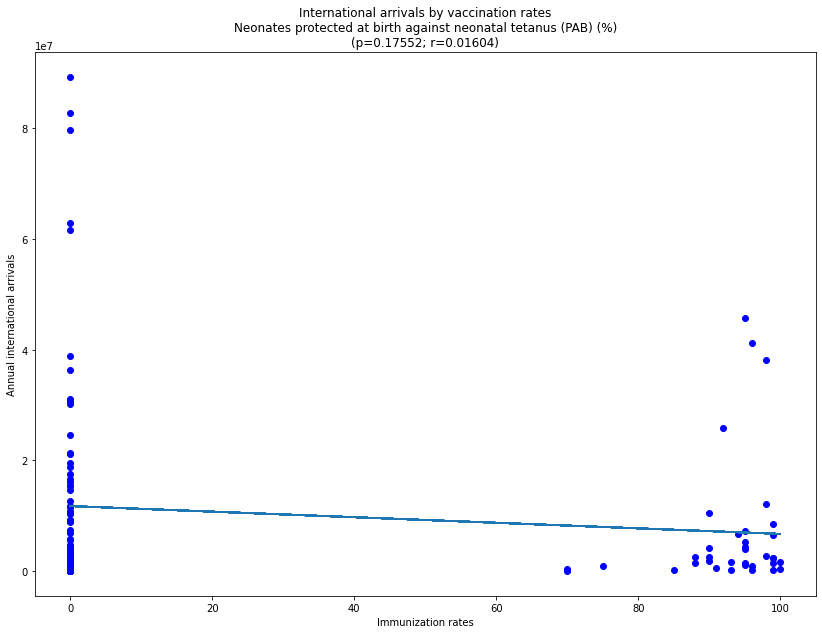

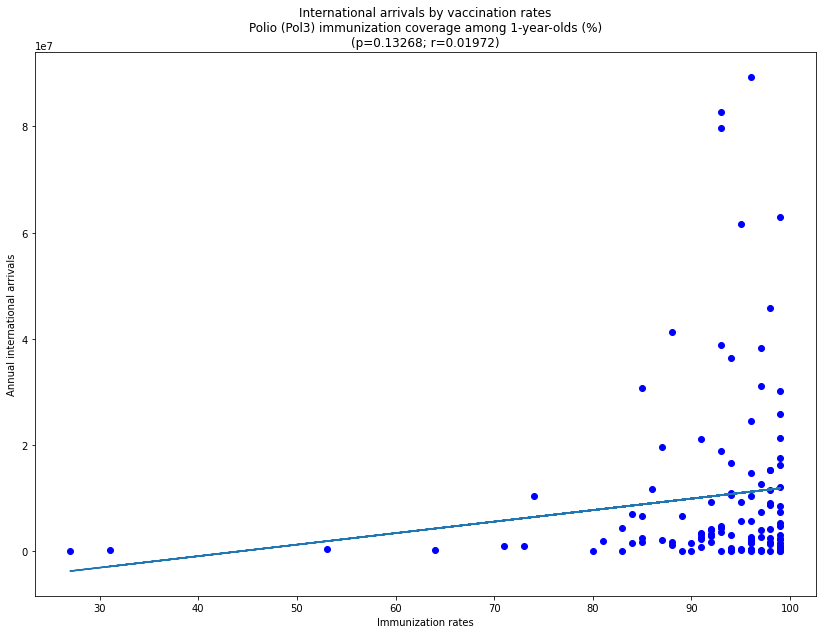

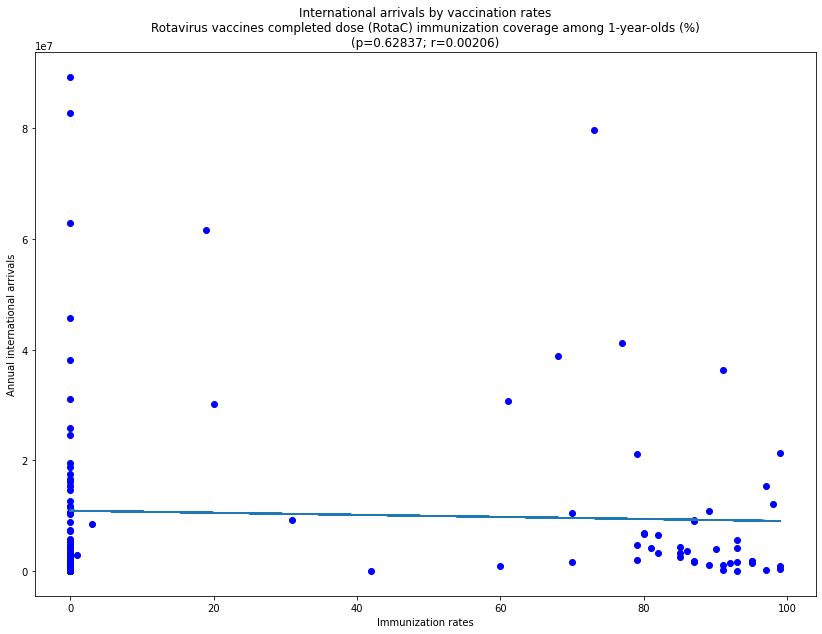

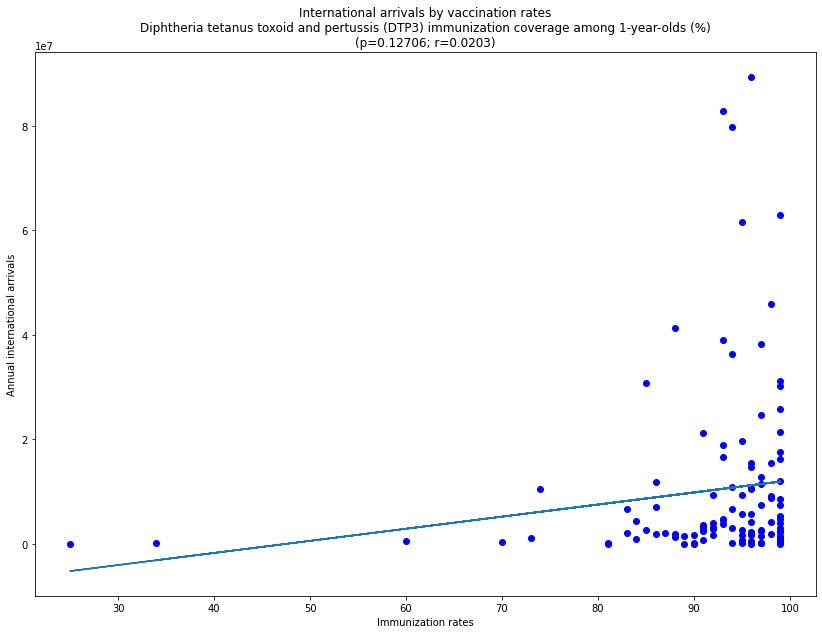

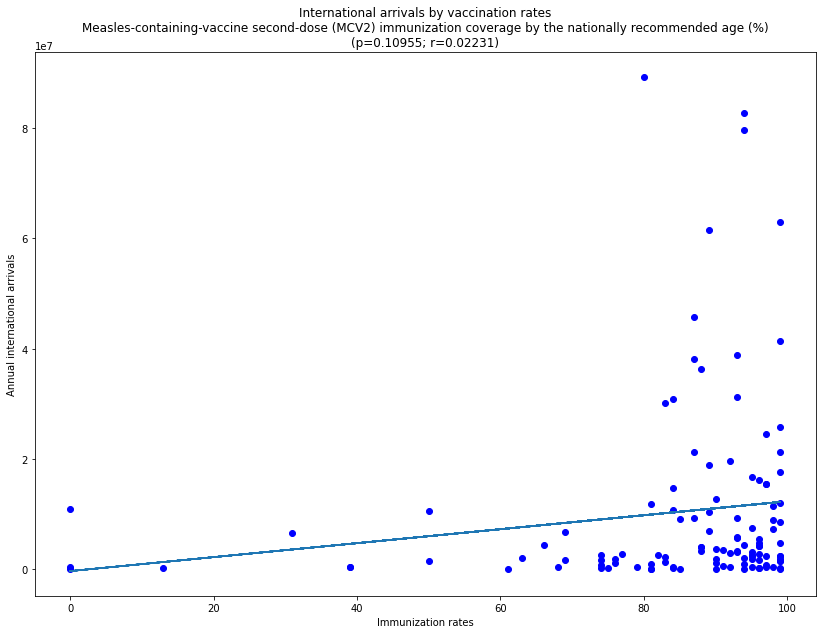

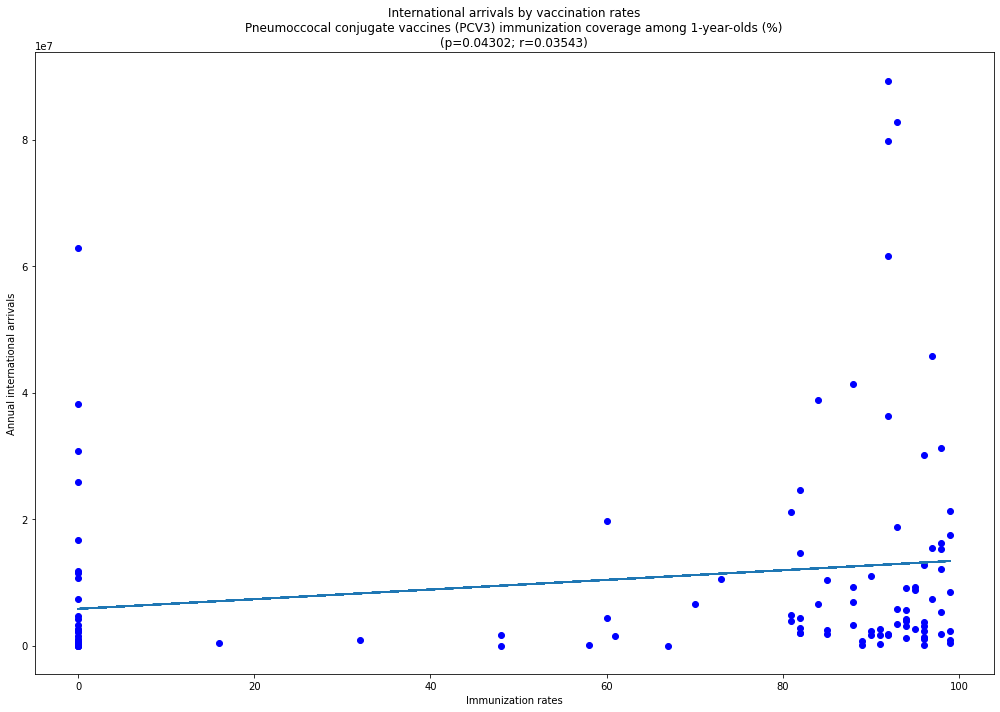

In [64]:
def plot_arrivals_by_vaccination_rates(cases, options = {}):
    options = {**default_options, **options}
    if 'omitted_countries' in options:
        for country in options['omitted_countries']:
            del cases[country]
    for vacc, immunization_rates_by_country in immunization_rates_by_country_by_vaccination().items():
        options['vaccination'] = vacc
        intl_arrivals_by_country = get_wdi_indicator(wdi_international_arrivals_indicator)
        fig, ax = plt.subplots()
        fig.set_size_inches(14,10)
        immunization_rates_ordered, intl_arrivals_ordered = group_rates_by_country(
            intl_arrivals_by_country,
            immunization_rates_by_country,
            options)
        X = sm.add_constant([[x] for x in immunization_rates_ordered])
        fit = sm.OLS(intl_arrivals_ordered, X).fit()
        plt.title(options['title'] + "\n" +
                  vacc + "\n(p=" + str(round(fit.pvalues[1],5)) +
                  "; r=" + str(round(fit.rsquared,5)) + ")")
        plt.xlabel("Immunization rates")
        plt.ylabel("Annual international arrivals")
        ax.plot(immunization_rates_ordered, intl_arrivals_ordered, 'bo')
        ax.plot(immunization_rates_ordered, [fit.params[1] * rate + fit.params[0] for rate in immunization_rates_ordered])
    plt.tight_layout()
    plt.show()

plot_arrivals_by_vaccination_rates(read_global_cases(), {
    "title": "International arrivals by vaccination rates",
    "income_threshold": "upper middle income",
    "max_days_beyond_threshold": 300
})

# Plot case growth rate by international arrivals

[1.13997385e+00 8.80057277e-10]


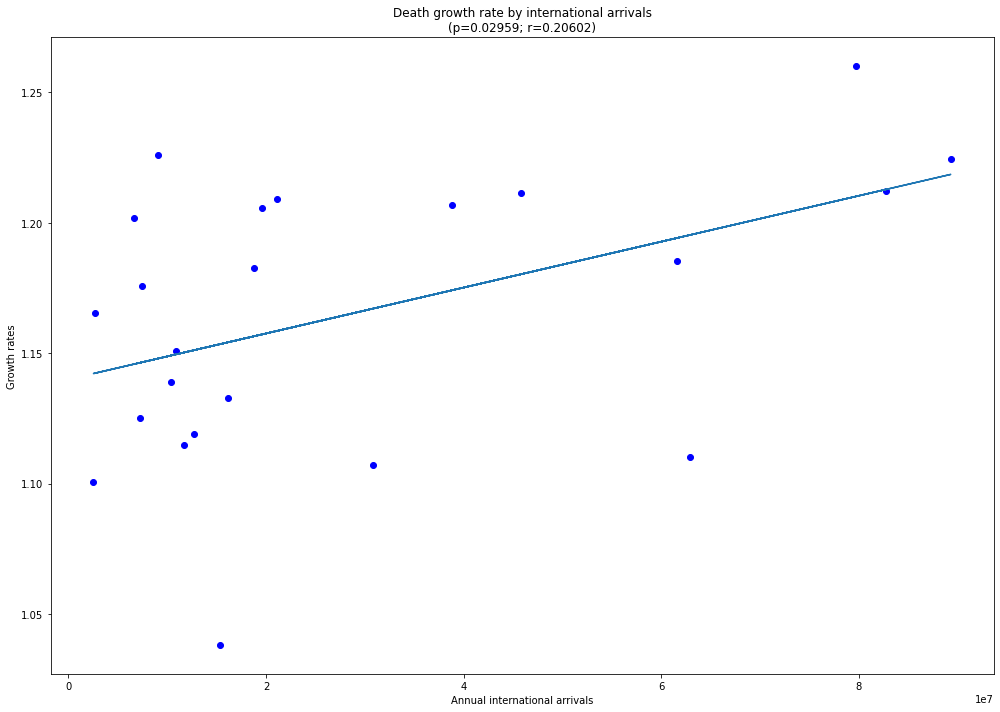

In [65]:
def plot_rate_by_intl_arrivals(cases, options = {}):
    options = {**default_options, **options}
    if 'omitted_countries' in options:
        for country in options['omitted_countries']:
            del cases[country]
    intl_arrivals_by_country = get_wdi_indicator(wdi_international_arrivals_indicator)
    fig, ax = plt.subplots()
    fig.set_size_inches(14,10)
    growth_rates_by_country = calculate_growth_rates_by_country(cases, options)
    intl_arrivals_ordered, growth_rates_ordered = group_rates_by_country(
        growth_rates_by_country,
        intl_arrivals_by_country,
        options)
    X = sm.add_constant([[x] for x in intl_arrivals_ordered])
    fit = sm.OLS(growth_rates_ordered, X).fit()
    plt.title(options['title'] + "\n(p=" + str(round(fit.pvalues[1],5)) +
              "; r=" + str(round(fit.rsquared,5)) + ")")
    plt.xlabel("Annual international arrivals")
    plt.ylabel("Growth rates")
    ax.plot(intl_arrivals_ordered, growth_rates_ordered, 'bo')
    print(fit.params)
    ax.plot(intl_arrivals_ordered, [fit.params[1] * rate + fit.params[0] for rate in intl_arrivals_ordered])
    plt.tight_layout()
    plt.show()

plot_rate_by_intl_arrivals(read_global_deaths(), {
    "title": "Death growth rate by international arrivals",
    "income_threshold": "upper middle income",
    "strategy": "rate",
    "max_days_beyond_threshold": 30,
})